# Multinomial Classification (normal or DOS or PROBE or R2L or U2R)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [4]:
train=pd.read_csv('NSL_Dataset\Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset\Test.txt',sep=',')

In [5]:
train.head()

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17.1  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...    0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...    0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...    1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...    1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...    0.07  0.07   

   0.17.2  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]

In [6]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [7]:
len(columns)

43

In [8]:
train.columns=columns
test.columns=columns

In [9]:
train.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  last_flag  
0   normal         15  
1  neptune         19  
2   normal         21  
3   normal         21  
4  neptune         21  

[5 rows x 43 columns]

In [10]:
test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         2           tcp  ftp_data    SF      12983          0     0   
2         0          icmp     eco_i    SF         20          0     0   
3         1           tcp    telnet  RSTO          0         15     0   
4         0           tcp      http    SF        267      14515     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.61   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    0.31   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.04                         0.61   
2                    0.00                         1.00   
3                    0.17                         0.03   
4                    0.00                         0.01   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.02                  0.00   
2                         0.28                  0.00   
3                         0.02                  0.00   
4                         0.03                  0.01   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  0.00                      0.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.83                      0.71   
4                       0.0                  0.00                      0.00   

    attack  last_flag  
0  neptune         21  
1   normal         21  
2    saint         15  
3    mscan         11  
4   normal         21  

[5 rows x 43 columns]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

In [13]:
train.describe().T

count          mean           std  min    25%  \
duration                     125972.0    287.146929  2.604526e+03  0.0   0.00   
src_bytes                    125972.0  45567.100824  5.870354e+06  0.0   0.00   
dst_bytes                    125972.0  19779.271433  4.021285e+06  0.0   0.00   
land                         125972.0      0.000198  1.408613e-02  0.0   0.00   
wrong_fragment               125972.0      0.022688  2.535310e-01  0.0   0.00   
urgent                       125972.0      0.000111  1.436608e-02  0.0   0.00   
hot                          125972.0      0.204411  2.149977e+00  0.0   0.00   
num_failed_logins            125972.0      0.001222  4.523932e-02  0.0   0.00   
logged_in                    125972.0      0.395739  4.890107e-01  0.0   0.00   
num_compromised              125972.0      0.279253  2.394214e+01  0.0   0.00   
root_shell                   125972.0      0.001342  3.660299e-02  0.0   0.00   
su_attempted                 125972.0      0.001103  4.515456e-02  0.0   0.00   
num_root                     125972.0      0.302194  2.439971e+01  0.0   0.00   
num_file_creations           125972.0      0.012669  4.839370e-01  0.0   0.00   
num_shells                   125972.0      0.000413  2.218122e-02  0.0   0.00   
num_access_files             125972.0      0.004096  9.936995e-02  0.0   0.00   
num_outbound_cmds            125972.0      0.000000  0.000000e+00  0.0   0.00   
is_host_login                125972.0      0.000008  2.817494e-03  0.0   0.00   
is_guest_login               125972.0      0.009423  9.661271e-02  0.0   0.00   
count                        125972.0     84.108207  1.145088e+02  0.0   2.00   
srv_count                    125972.0     27.738093  7.263609e+01  0.0   2.00   
serror_rate                  125972.0      0.284487  4.464567e-01  0.0   0.00   
srv_serror_rate              125972.0      0.282488  4.470236e-01  0.0   0.00   
rerror_rate                  125972.0      0.119959  3.204366e-01  0.0   0.00   
srv_rerror_rate              125972.0      0.121184  3.236483e-01  0.0   0.00   
same_srv_rate                125972.0      0.660925  4.396236e-01  0.0   0.09   
diff_srv_rate                125972.0      0.063053  1.803150e-01  0.0   0.00   
srv_diff_host_rate           125972.0      0.097322  2.598314e-01  0.0   0.00   
dst_host_count               125972.0    182.149200  9.920657e+01  0.0  82.00   
dst_host_srv_count           125972.0    115.653725  1.107029e+02  0.0  10.00   
dst_host_same_srv_rate       125972.0      0.521244  4.489501e-01  0.0   0.05   
dst_host_diff_srv_rate       125972.0      0.082952  1.889225e-01  0.0   0.00   
dst_host_same_src_port_rate  125972.0      0.148379  3.089984e-01  0.0   0.00   
dst_host_srv_diff_host_rate  125972.0      0.032543  1.125642e-01  0.0   0.00   
dst_host_serror_rate         125972.0      0.284455  4.447851e-01  0.0   0.00   
dst_host_srv_serror_rate     125972.0      0.278487  4.456702e-01  0.0   0.00   
dst_host_rerror_rate         125972.0      0.118832  3.065586e-01  0.0   0.00   
dst_host_srv_rerror_rate     125972.0      0.120241  3.194605e-01  0.0   0.00   
last_flag                    125972.0     19.504056  2.291512e+00  0.0  18.00   

                                50%     75%           max  
duration                       0.00    0.00  4.290800e+04  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
land                           0.00    0.00  1.000000e+00  
wrong_fragment                 0.00    0.00  3.000000e+00  
urgent                         0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
num_failed_logins              0.00    0.00  5.000000e+00  
logged_in                      0.00    1.00  1.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
root_shell                     0.00    0.00  1.000000e+00  
su_attempted                   0.00    0.00  2.000000e+00  
num_root   

In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [14]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [15]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [16]:
train.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.60   
1               0       0    0  ...                    0.05   
2               0       0    0  ...                    0.00   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate   attack  last_flag  attack_class  
0                      0.00   normal         15           0.0  
1                      0.00  neptune         19           1.0  
2                      0.01   normal         21           0.0  
3                      0.00   normal         21           0.0  
4                      1.00  neptune         21           1.0  

[5 rows x 44 columns]

In [17]:
train.shape

(125972, 44)

In [62]:
pandas_profiling.ProfileReport(train)

### Exporting pandas profiling output to html file

In [64]:
output = pandas_profiling.ProfileReport(train)
output.to_file(outputfile='pandas_profiling.html')

### Basic Exploratory Analysis

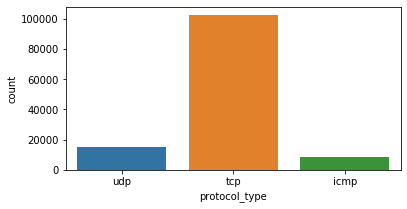

In [18]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

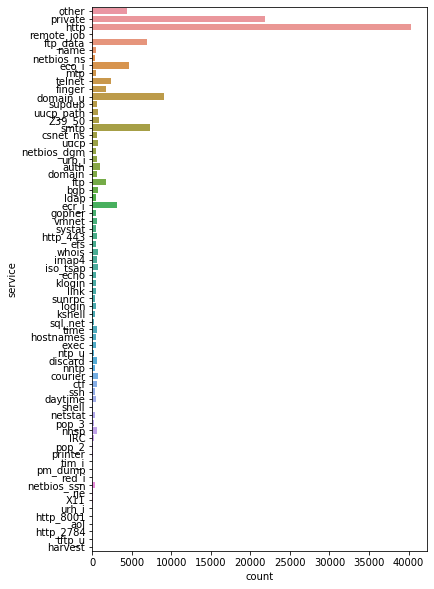

In [19]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

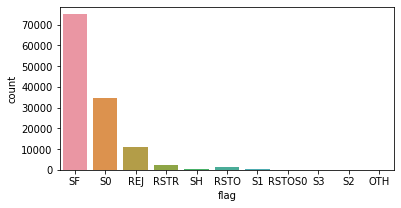

In [20]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

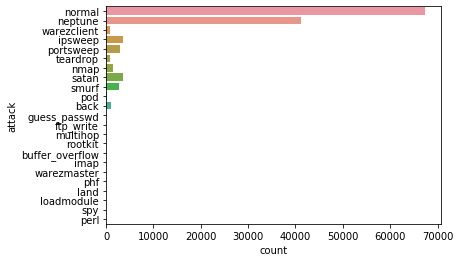

In [21]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

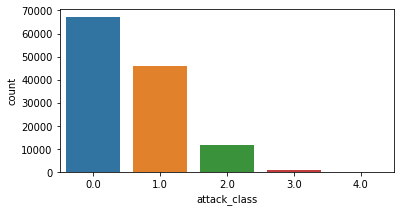

In [22]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [23]:
train.groupby('attack_class').mean().T

attack_class                          0.0          1.0            2.0  \
duration                       168.589899     0.006227    2074.858185   
src_bytes                    13133.467064  1176.321162  385679.838367   
dst_bytes                     4329.749517   169.201537  181074.911805   
land                             0.000104     0.000392       0.000000   
wrong_fragment                   0.000000     0.062229       0.000000   
urgent                           0.000148     0.000000       0.000000   
hot                              0.230658     0.039889       0.001630   
num_failed_logins                0.001381     0.000000       0.000343   
logged_in                        0.710656     0.020837       0.007121   
num_compromised                  0.507083     0.019226       0.000601   
root_shell                       0.002034     0.000000       0.000000   
su_attempted                     0.002049     0.000000       0.000000   
num_root                         0.562932     0.000000       0.000601   
num_file_creations               0.022274     0.000000       0.001716   
num_shells                       0.000609     0.000000       0.000000   
num_access_files                 0.007499     0.000000       0.000000   
num_outbound_cmds                0.000000     0.000000       0.000000   
is_host_login                    0.000015     0.000000       0.000000   
is_guest_login                   0.012964     0.000000       0.000086   
count                           22.518250   178.090034      77.052248   
srv_count                       27.686035    32.656346      10.936084   
serror_rate                      0.013441     0.748494       0.046525   
srv_serror_rate                  0.012084     0.746678       0.040160   
rerror_rate                      0.044197     0.152107       0.437319   
srv_rerror_rate                  0.044630     0.153000       0.444469   
same_srv_rate                    0.969360     0.191887       0.697196   
diff_srv_rate                    0.028788     0.065403       0.256567   
srv_diff_host_rate               0.126265     0.005317       0.299903   
dst_host_count                 147.431885   244.600475     145.204101   
dst_host_srv_count             190.288215    26.524005      42.367193   
dst_host_same_srv_rate           0.811885     0.123423       0.390825   
dst_host_diff_srv_rate           0.040134     0.066333       0.401263   
dst_host_same_src_port_rate      0.121725     0.049492       0.651840   
dst_host_srv_diff_host_rate      0.025996     0.001647       0.187343   
dst_host_serror_rate             0.013930     0.747922       0.044757   
dst_host_srv_serror_rate         0.006117     0.744434       0.039799   
dst_host_rerror_rate             0.046589     0.157569       0.389717   
dst_host_srv_rerror_rate         0.044699     0.151286       0.441030   
last_flag                       20.315925    19.311560      16.461050   

attack_class                           3.0          4.0  
duration                        633.417085    80.942308  
src_bytes                    307727.300503   906.230769  
dst_bytes                     81822.026131  5141.961538  
land                              0.000000     0.000000  
wrong_fragment                    0.000000     0.000000  
urgent                            0.003015     0.019231  
hot                               8.334673     1.403846  
num_failed_logins                 0.056281     0.019231  
logged_in                         0.913568     0.884615  
num_compromised                   0.077387     1.211538  
root_shell                        0.006030     0.500000  
su_attempted                      0.001005     0.000000  
num_root                          0.111558     0.788462  
num_file_creations                0.035176     0.788462  
num_shells                        0.004020     0.134615  
num_access_files                  0.010050     0.019231  
num_outbound_cmds                 0.000000     0.000000  
is_host_login                     0

##### Observations:
- The length of time duration of connection for attack is higher than  normal.
- Wrong fragments in the connection is only present in attack.
- Number of outbound commands in an ftp session  are 0 in both normal and attack.

In [18]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [19]:
numeric_var_names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [20]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [21]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        146          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         0        232       8153     0               0       0    0   
3         0        199        420     0               0       0    0   
4         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_same_srv_rate  \
0                  0          0                0  ...                    0.00   
1                  0          0                0  ...                    0.10   
2                  0          1                0  ...                    1.00   
3                  0          1                0  ...                    1.00   
4                  0          0                0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

   last_flag  attack_class  
0         15           0.0  
1         19           1.0  
2         21           0.0  
3         21           0.0  
4         21           1.0  

[5 rows x 40 columns]

In [22]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

protocol_type  service flag   attack
0           udp    other   SF   normal
1           tcp  private   S0  neptune
2           tcp     http   SF   normal
3           tcp     http   SF   normal
4           tcp  private  REJ  neptune

### Data Audit Report

In [23]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [24]:
num_summary

N  NMISS           SUM          MEAN  \
duration                     125972.0    0.0  3.617247e+07    287.146929   
src_bytes                    125972.0    0.0  5.740179e+09  45567.100824   
dst_bytes                    125972.0    0.0  2.491634e+09  19779.271433   
land                         125972.0    0.0  2.500000e+01      0.000198   
wrong_fragment               125972.0    0.0  2.858000e+03      0.022688   
urgent                       125972.0    0.0  1.400000e+01      0.000111   
hot                          125972.0    0.0  2.575000e+04      0.204411   
num_failed_logins            125972.0    0.0  1.540000e+02      0.001222   
logged_in                    125972.0    0.0  4.985200e+04      0.395739   
num_compromised              125972.0    0.0  3.517800e+04      0.279253   
root_shell                   125972.0    0.0  1.690000e+02      0.001342   
su_attempted                 125972.0    0.0  1.390000e+02      0.001103   
num_root                     125972.0    0.0  3.806800e+04      0.302194   
num_file_creations           125972.0    0.0  1.596000e+03      0.012669   
num_shells                   125972.0    0.0  5.200000e+01      0.000413   
num_access_files             125972.0    0.0  5.160000e+02      0.004096   
num_outbound_cmds            125972.0    0.0  0.000000e+00      0.000000   
is_host_login                125972.0    0.0  1.000000e+00      0.000008   
is_guest_login               125972.0    0.0  1.187000e+03      0.009423   
count                        125972.0    0.0  1.059528e+07     84.108207   
srv_count                    125972.0    0.0  3.494223e+06     27.738093   
serror_rate                  125972.0    0.0  3.583737e+04      0.284487   
srv_serror_rate              125972.0    0.0  3.558553e+04      0.282488   
rerror_rate                  125972.0    0.0  1.511153e+04      0.119959   
srv_rerror_rate              125972.0    0.0  1.526582e+04      0.121184   
same_srv_rate                125972.0    0.0  8.325804e+04      0.660925   
diff_srv_rate                125972.0    0.0  7.942930e+03      0.063053   
srv_diff_host_rate           125972.0    0.0  1.225990e+04      0.097322   
dst_host_count               125972.0    0.0  2.294570e+07    182.149200   
dst_host_srv_count           125972.0    0.0  1.456913e+07    115.653725   
dst_host_same_srv_rate       125972.0    0.0  6.566221e+04      0.521244   
dst_host_diff_srv_rate       125972.0    0.0  1.044957e+04      0.082952   
dst_host_same_src_port_rate  125972.0    0.0  1.869156e+04      0.148379   
dst_host_srv_diff_host_rate  125972.0    0.0  4.099470e+03      0.032543   
dst_host_serror_rate         125972.0    0.0  3.583333e+04      0.284455   
dst_host_srv_serror_rate     125972.0    0.0  3.508153e+04      0.278487   
dst_host_rerror_rate         125972.0    0.0  1.496955e+04      0.118832   
dst_host_srv_rerror_rate     125972.0    0.0  1.514698e+04      0.120241   
last_flag                    125972.0    0.0  2.456965e+06     19.504056   
attack_class                 125972.0    0.0  7.243200e+04      0.574985   

                             MEDIAN           STD           VAR  MIN    P1  \
duration                       0.00  2.604526e+03  6.783553e+06  0.0   0.0   
src_bytes                     44.00  5.870354e+06  3.446106e+13  0.0   0.0   
dst_bytes                      0.00  4.021285e+06  1.617073e+13  0.0   0.0   
land                           0.00  1.408613e-02  1.984190e-04  0.0   0.0   
wrong_fragment                 0.00  2.535310e-01  6.427796e-02  0.0   0.0   
urgent                         0.00  1.436608e-02  2.063844e-04  0.0   0.0   
hot                            0.00  2.149977e+00  4.622401e+00  0.0   0.0   
num_failed_logins              0.00  4.523932e-02  2.046596e-03  0.0   0.0   
logged_in                      0.00  4.890107e-01  2.391315e-01  0.0   0.0   
num_compromised                0.00  2.394214e+01  5.732259e+02  0.0   0.0   
root_shell                     0.00  3.660299e-02  1.339779e-

In [25]:
num_summary.to_csv('num_summary.csv')

### Handling Outlier

In [26]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


#### No missing in train dataset . So , Missing treatment not required .

In [27]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(cat_summary)

In [28]:
cat_summary

protocol_type  \
N                                                        125972   
NMISS                                                         0   
ColumnsNames  tcp     102688
udp      14993
icmp      8291
N...   

                                                        service  \
N                                                        125972   
NMISS                                                         0   
ColumnsNames  http           40338
private        21853
doma...   

                                                           flag  \
N                                                        125972   
NMISS                                                         0   
ColumnsNames  SF        74944
S0        34851
REJ       1123...   

                                                         attack  
N                                                        125972  
NMISS                                                         0  
ColumnsNames  normal             67342
neptune            41...

### Dummy Variable Creation

In [29]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [30]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

protocol_type_tcp  protocol_type_udp  service_X11  service_Z39_50  \
0                  0                  1            0               0   
1                  1                  0            0               0   
2                  1                  0            0               0   
3                  1                  0            0               0   
4                  1                  0            0               0   

   service_aol  service_auth  service_bgp  service_courier  service_csnet_ns  \
0            0             0            0                0                 0   
1            0             0            0                0                 0   
2            0             0            0                0                 0   
3            0             0            0                0                 0   
4            0             0            0                0                 0   

   service_ctf  ...  attack_phf  attack_pod  attack_portsweep  attack_rootkit  \
0            0  ...           0           0                 0               0   
1            0  ...           0           0                 0               0   
2            0  ...           0           0                 0               0   
3            0  ...           0           0                 0               0   
4            0  ...           0           0                 0               0   

   attack_satan  attack_smurf  attack_spy  attack_teardrop  \
0             0             0           0                0   
1             0             0           0                0   
2             0             0           0                0   
3             0             0           0                0   
4             0             0           0                0   

   attack_warezclient  attack_warezmaster  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 103 columns]

### Final file for analysis

In [31]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0        146          0     0               0       0    0   
1       0.0          0          0     0               0       0    0   
2       0.0        232       8153     0               0       0    0   
3       0.0        199        420     0               0       0    0   
4       0.0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  attack_phf  attack_pod  \
0                  0          0                0  ...           0           0   
1                  0          0                0  ...           0           0   
2                  0          1                0  ...           0           0   
3                  0          1                0  ...           0           0   
4                  0          0                0  ...           0           0   

   attack_portsweep  attack_rootkit  attack_satan  attack_smurf  attack_spy  \
0                 0               0             0             0           0   
1                 0               0             0             0           0   
2                 0               0             0             0           0   
3                 0               0             0             0           0   
4                 0               0             0             0           0   

   attack_teardrop  attack_warezclient  attack_warezmaster  
0                0                   0                   0  
1                0                   0                   0  
2                0                   0                   0  
3                0                   0                   0  
4                0                   0                   0  

[5 rows x 143 columns]

In [32]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

duration  src_bytes  dst_bytes  land  wrong_fragment  \
duration                1.000000   0.011740   0.036892   NaN             NaN   
src_bytes               0.011740   1.000000   0.127827   NaN             NaN   
dst_bytes               0.036892   0.127827   1.000000   NaN             NaN   
land                         NaN        NaN        NaN   NaN             NaN   
wrong_fragment               NaN        NaN        NaN   NaN             NaN   
urgent                       NaN        NaN        NaN   NaN             NaN   
hot                     0.021274   0.379973   0.127002   NaN             NaN   
num_failed_logins            NaN        NaN        NaN   NaN             NaN   
logged_in              -0.064538   0.163275   0.421999   NaN             NaN   
num_compromised         0.062081   0.603363   0.237363   NaN             NaN   
root_shell                   NaN        NaN        NaN   NaN             NaN   
su_attempted                 NaN        NaN        NaN   NaN             NaN   
num_root                     NaN        NaN        NaN   NaN             NaN   
num_file_creations           NaN        NaN        NaN   NaN             NaN   
num_shells                   NaN        NaN        NaN   NaN             NaN   
num_access_files             NaN        NaN        NaN   NaN             NaN   
num_outbound_cmds            NaN        NaN        NaN   NaN             NaN   
is_host_login                NaN        NaN        NaN   NaN             NaN   
is_guest_login               NaN        NaN        NaN   NaN             NaN   
count                  -0.099244  -0.105271  -0.237214   NaN             NaN   
srv_count              -0.050309  -0.036083  -0.087531   NaN             NaN   
serror_rate            -0.087514  -0.100189  -0.201776   NaN             NaN   
srv_serror_rate        -0.087146  -0.099507  -0.202172   NaN             NaN   
rerror_rate             0.173108  -0.044664  -0.118673   NaN             NaN   
srv_rerror_rate         0.173607  -0.033164  -0.113904   NaN             NaN   
same_srv_rate           0.085869   0.119281   0.268596   NaN             NaN   
diff_srv_rate           0.001608  -0.035557  -0.112569   NaN             NaN   
srv_diff_host_rate     -0.050099   0.011234   0.012879   NaN             NaN   
dst_host_count          0.054295  -0.073045  -0.209267   NaN             NaN   
dst_host_srv_count     -0.135982   0.000055   0.323253   NaN             NaN   
...                          ...        ...        ...   ...             ...   
flag_RSTOS0             0.020369   0.007541  -0.010092   NaN             NaN   
flag_RSTR               0.497641   0.018268  -0.021514   NaN             NaN   
flag_S0                -0.085618  -0.103728  -0.218182   NaN             NaN   
flag_S1                -0.007463   0.041955   0.137051   NaN             NaN   
flag_S2                -0.004180   0.011526   0.043579   NaN             NaN   
flag_S3                 0.004280   0.031067   0.008654   NaN             NaN   
flag_SF                -0.034730   0.117346   0.260375   NaN             NaN   
flag_SH                -0.006428  -0.007788  -0.016381   NaN             NaN   
attack_buffer_overflow -0.000845   0.000933   0.014189   NaN             NaN   
attack_ftp_write       -0.000868  -0.001050   0.004817   NaN             NaN   
attack_guess_passwd    -0.002789  -0.003022  -0.006072   NaN             NaN   
attack_imap            -0.001238  -0.000990   0.004679   NaN             NaN   
attack_ipsweep         -0.023313  -0.028496  -0.060146   NaN             NaN   
attack_land            -0.001655  -0.002005  -0.004217   NaN             NaN   
attack_loadmodule      -0.000891  -0.001209   0.003706   NaN             NaN   
attack_multihop         0.000220  -0.000722   0.021495   NaN             NaN   
attack_neptune         -0.096538  -0.116931  -0.246006   NaN             NaN   
attack_nmap            -0.015162  -0.017706  -0.038631   NaN             NaN   
attack_normal          -

In [33]:
corrm.to_csv('corrm.csv')

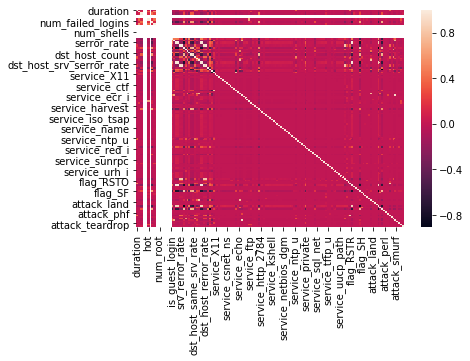

In [34]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

#### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [35]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

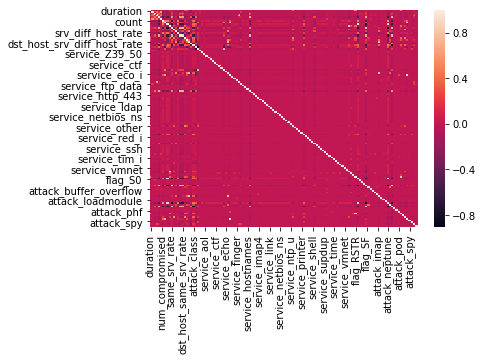

In [36]:
sns.heatmap(train_new.corr())

#### Variable reduction using WOE or log(odds)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


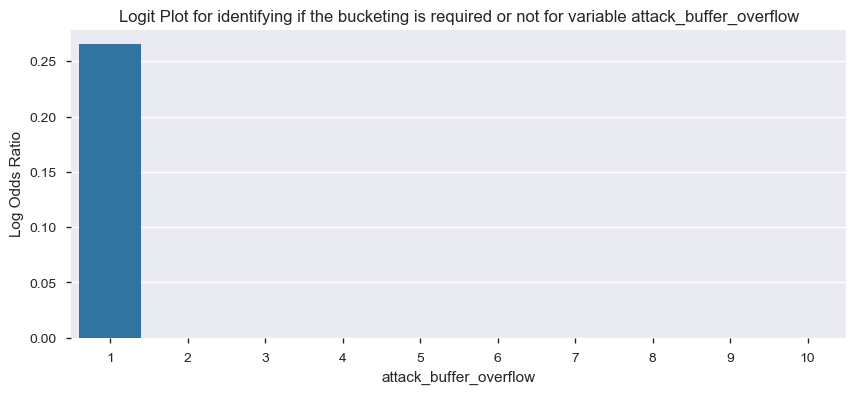

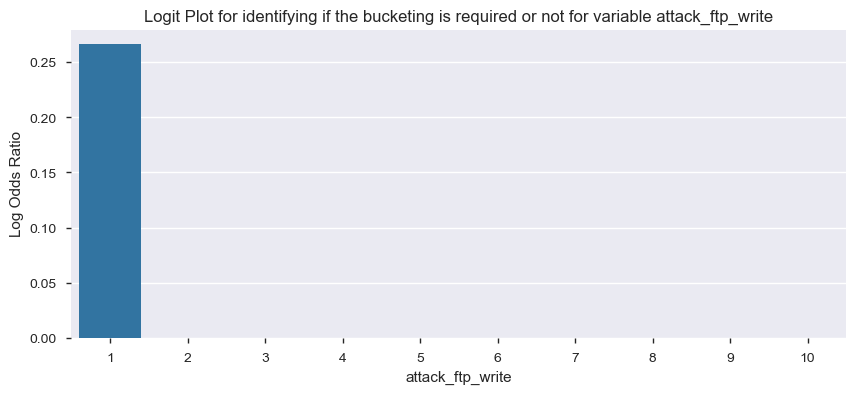

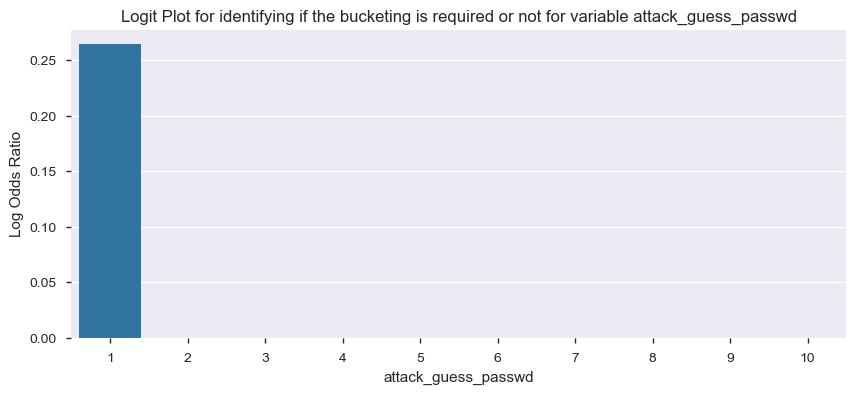

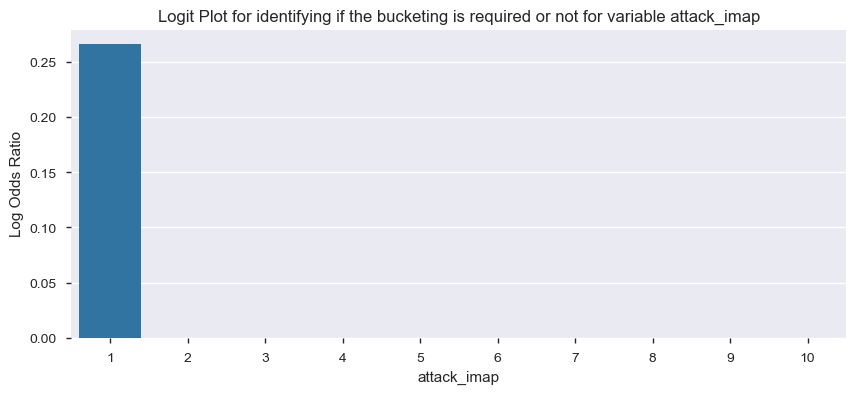

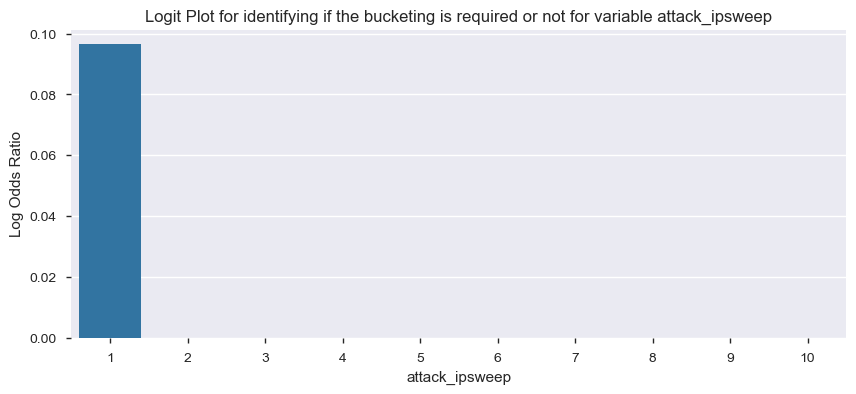

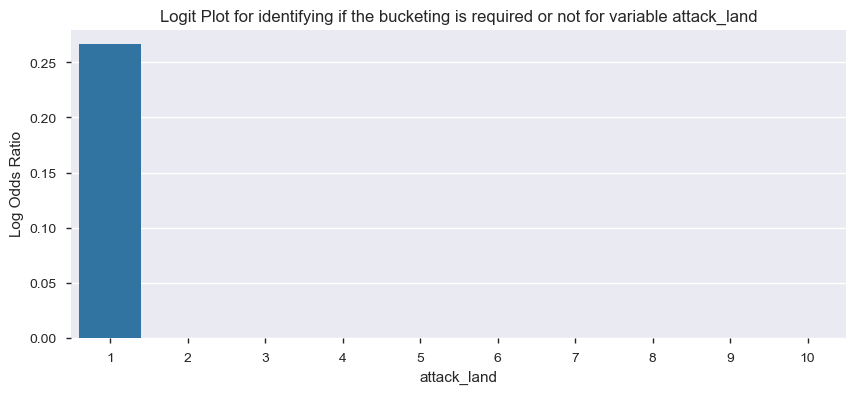

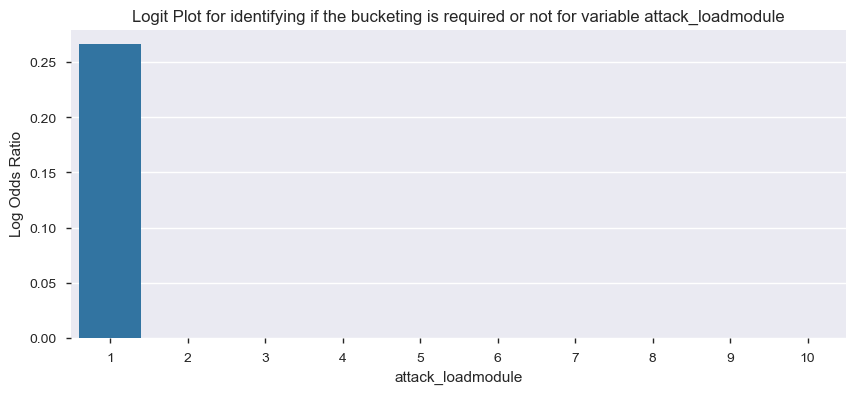

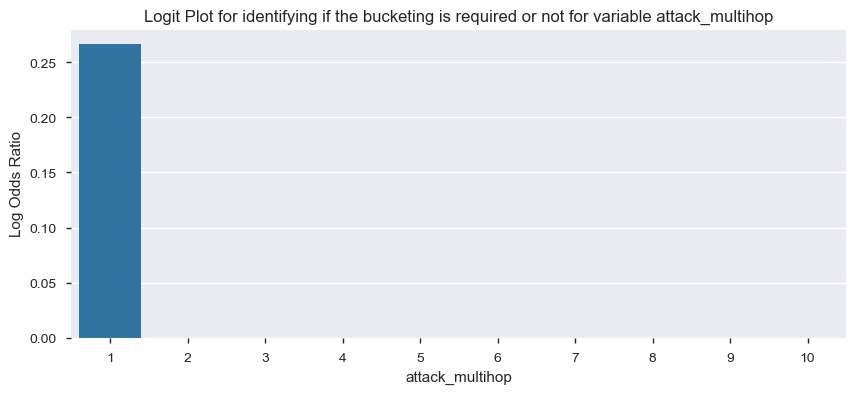

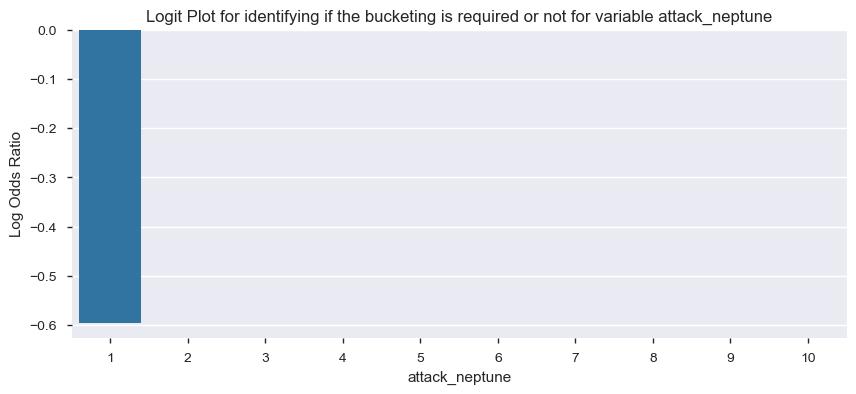

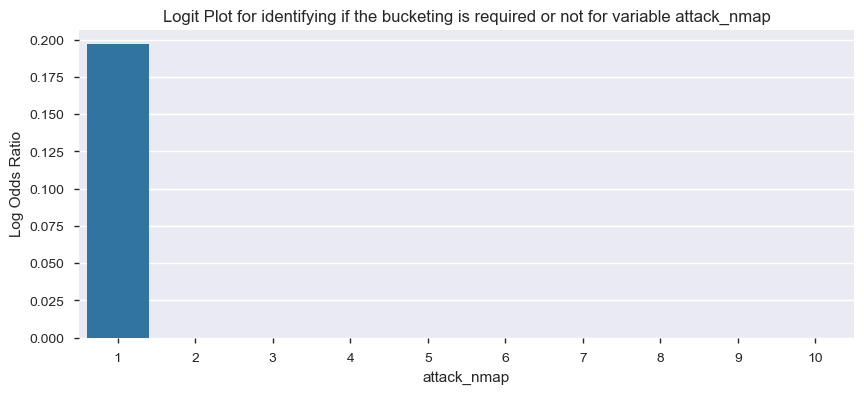

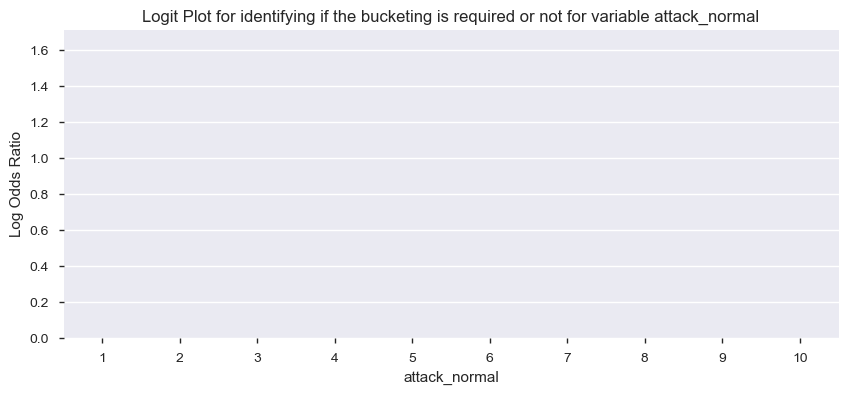

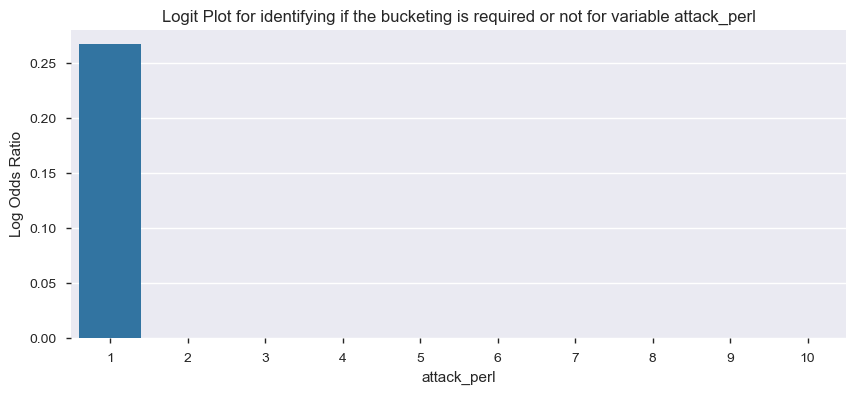

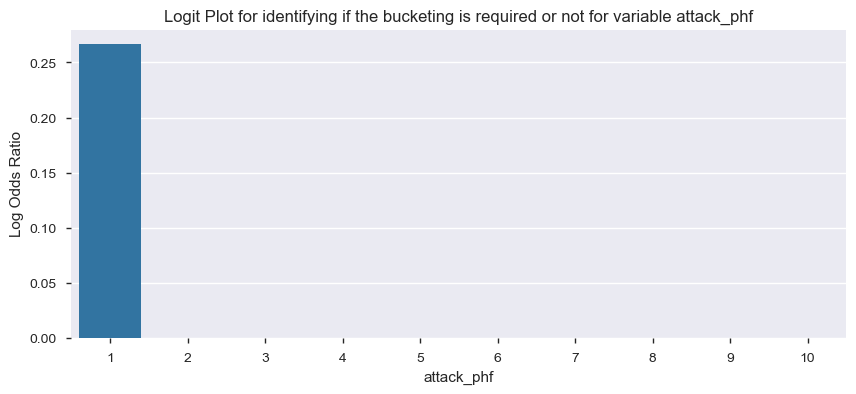

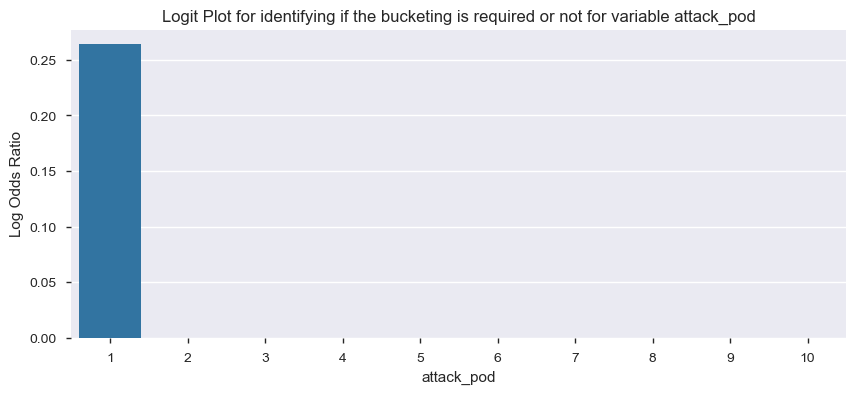

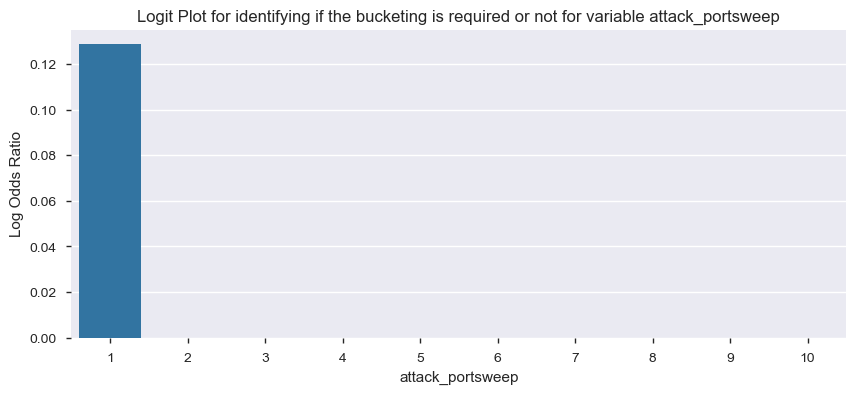

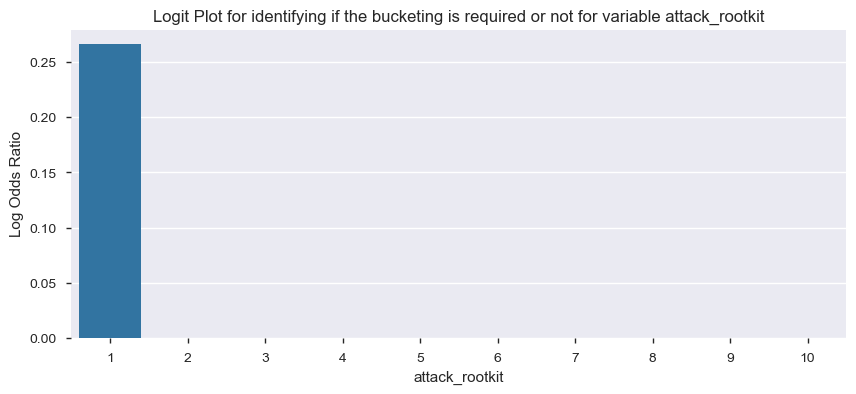

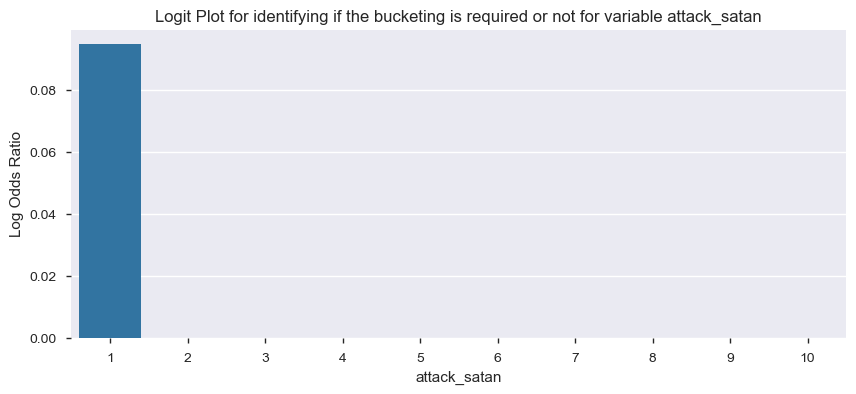

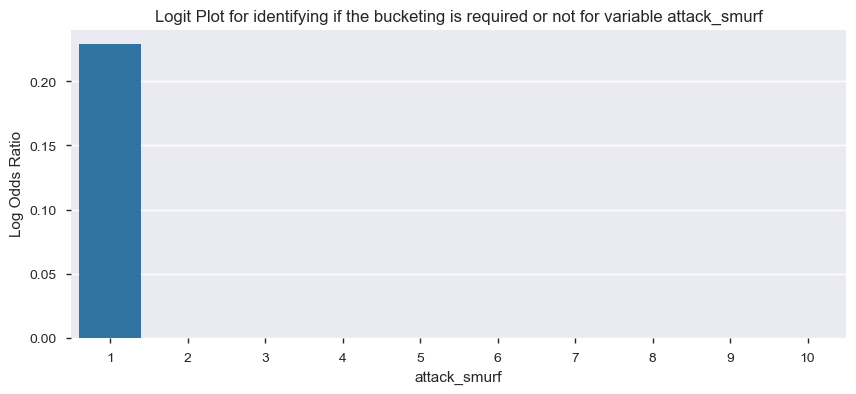

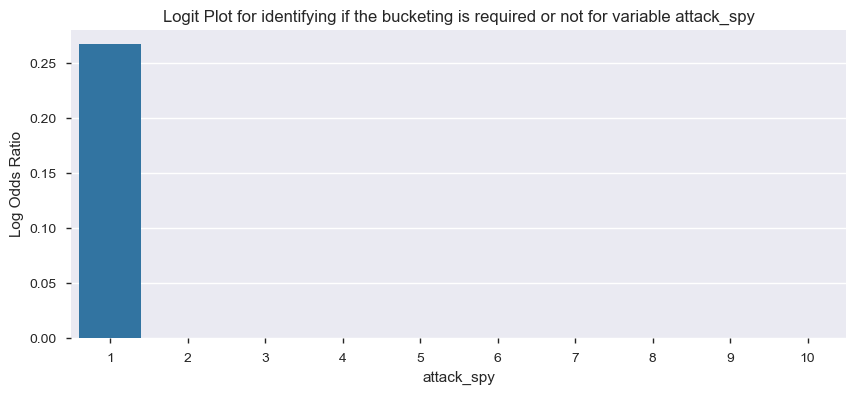

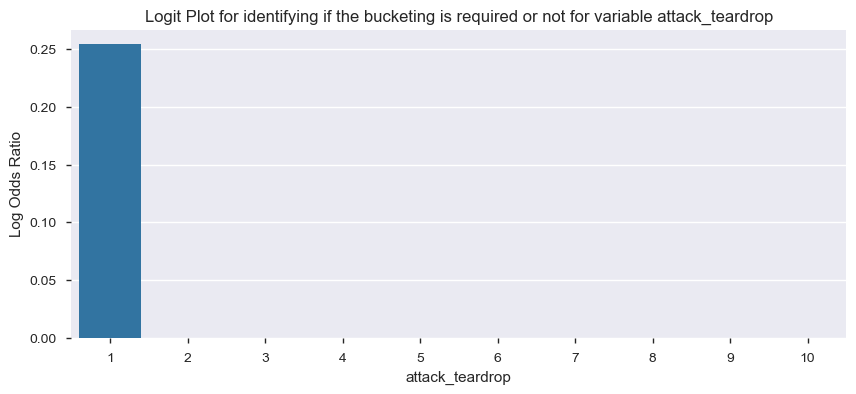

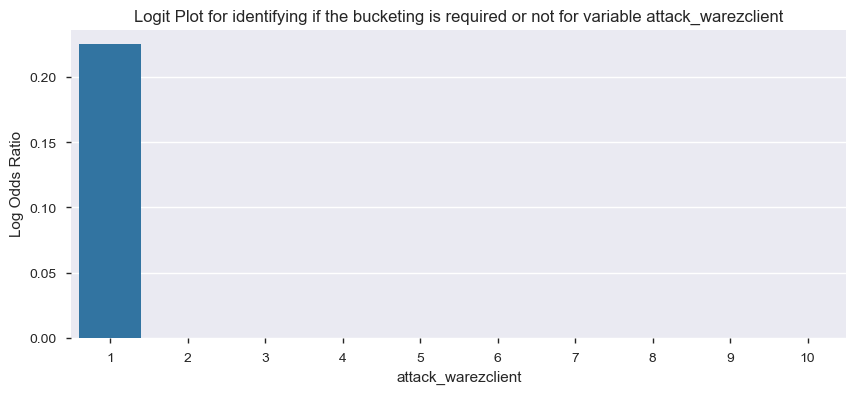

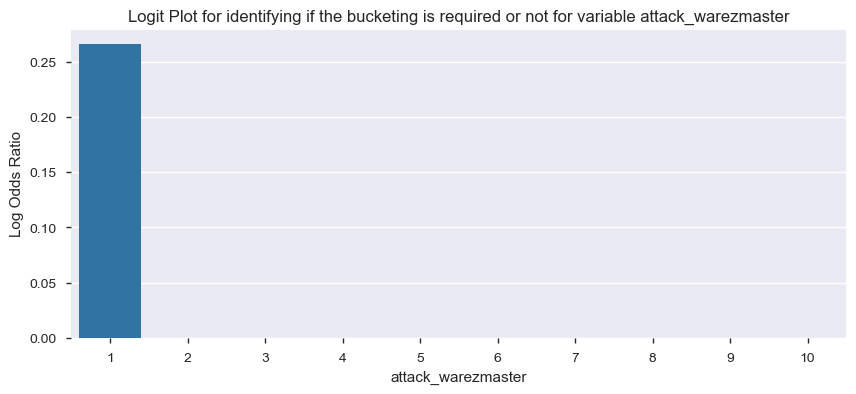

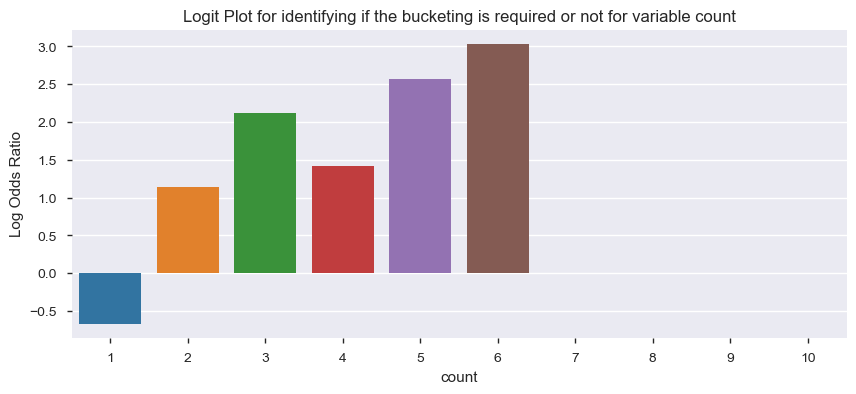

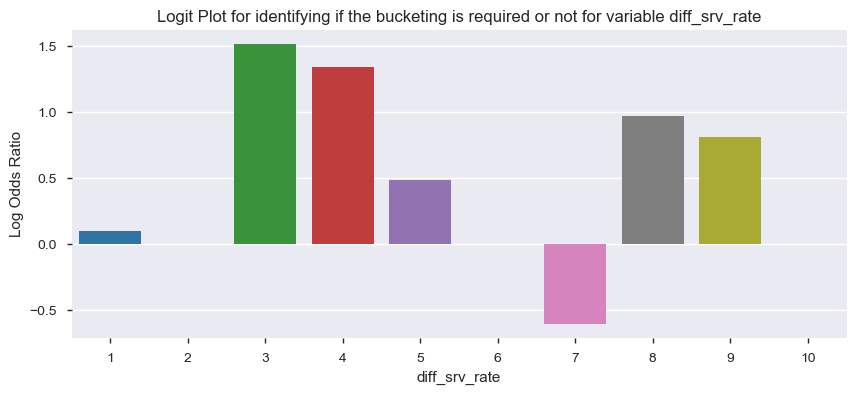

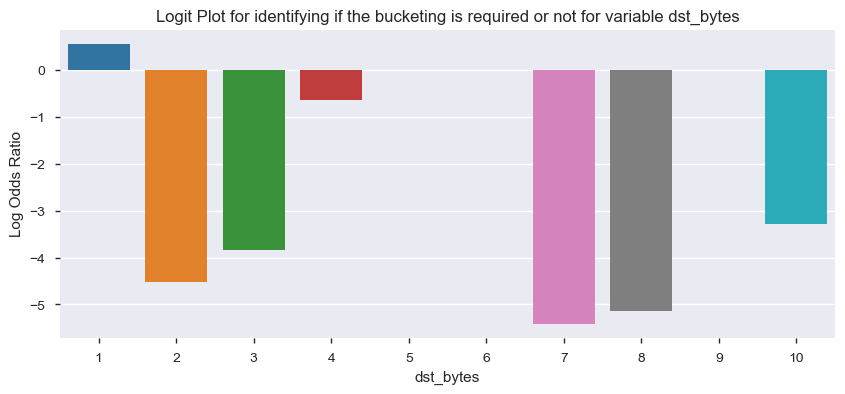

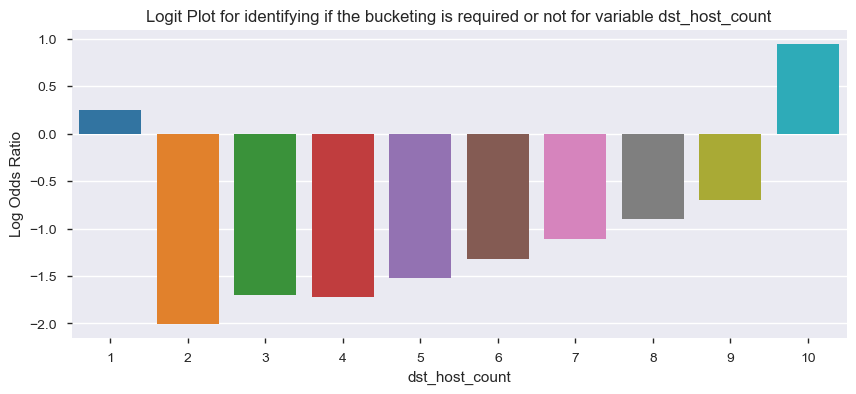

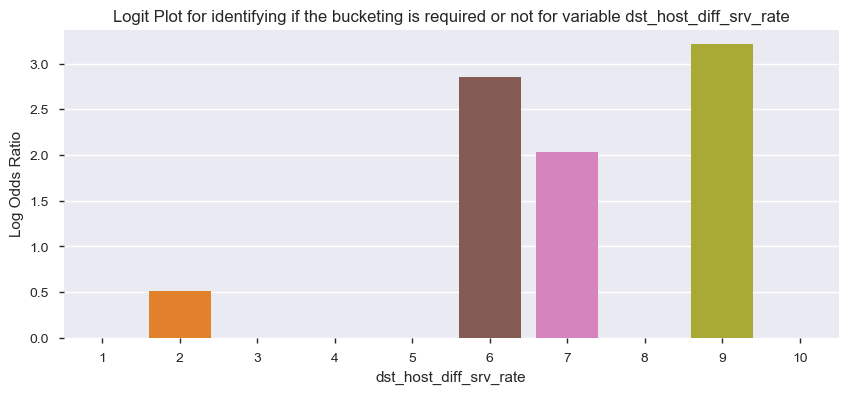

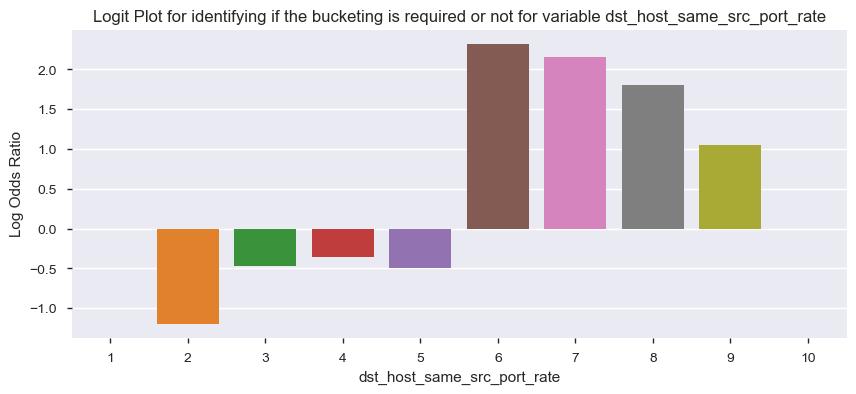

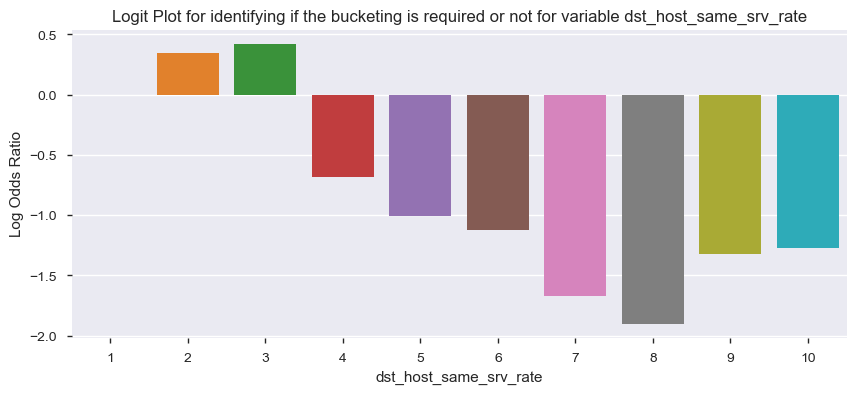

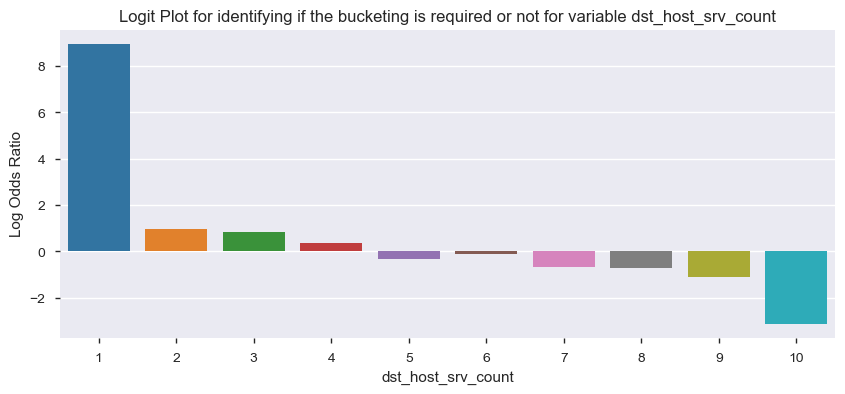

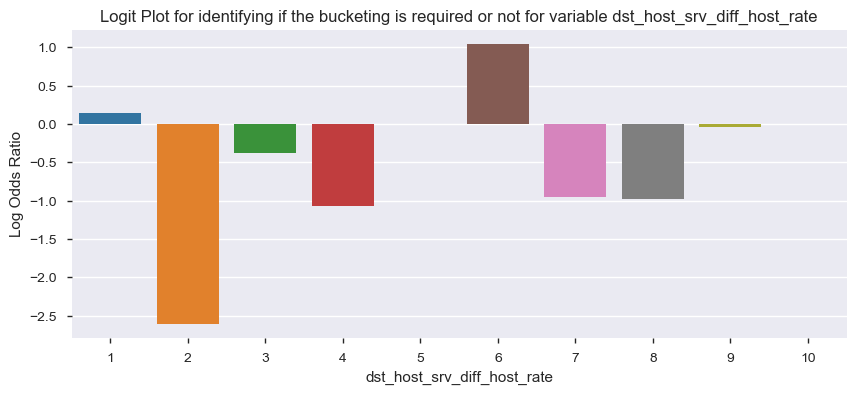

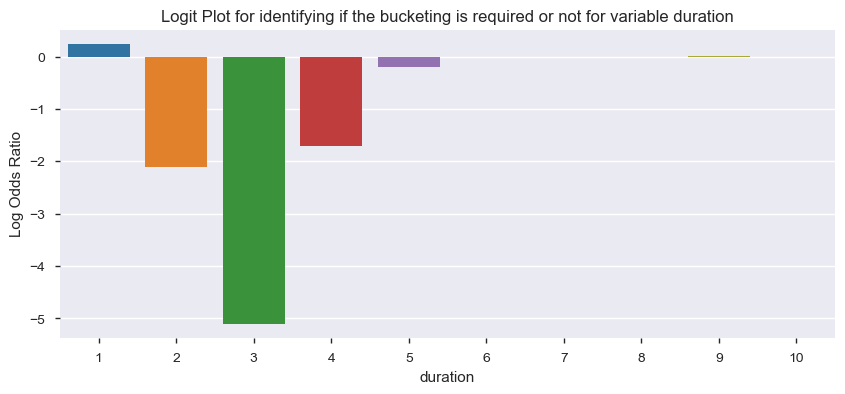

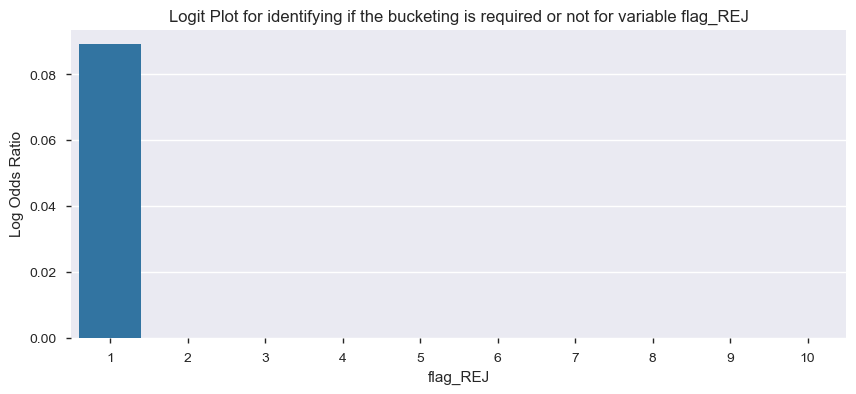

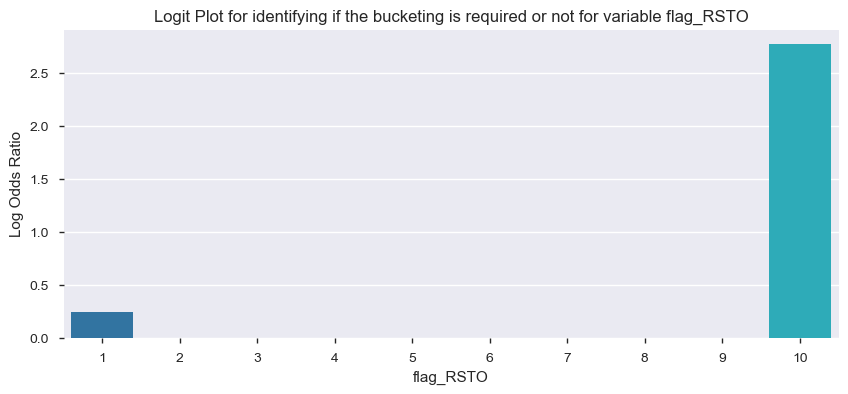

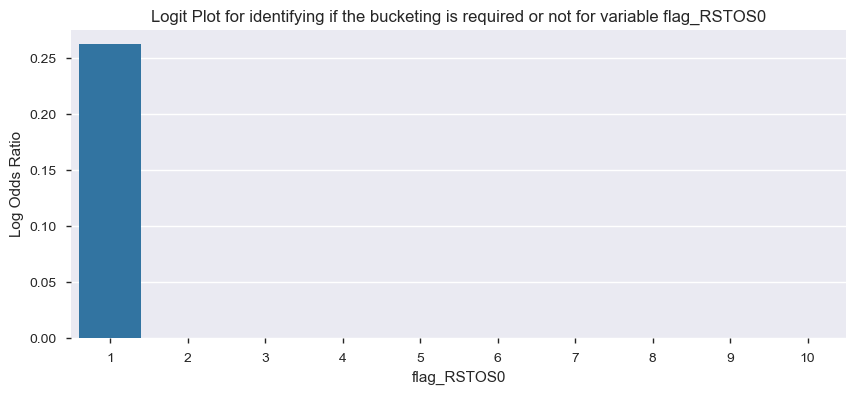

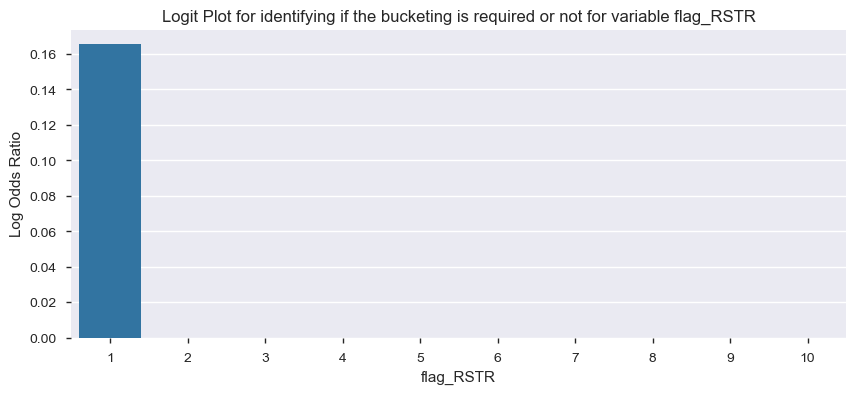

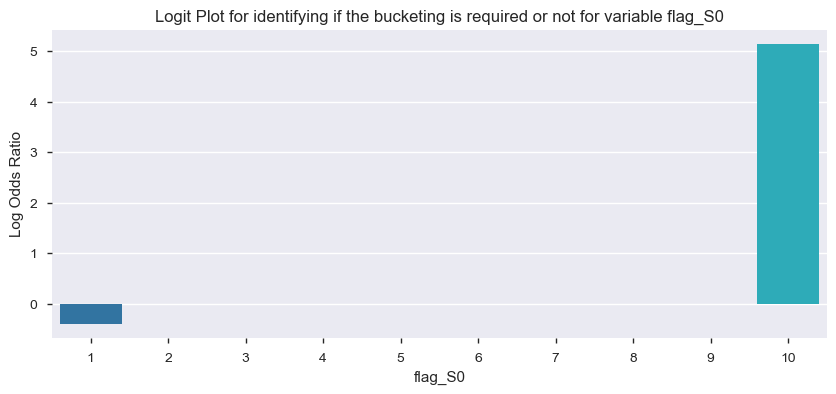

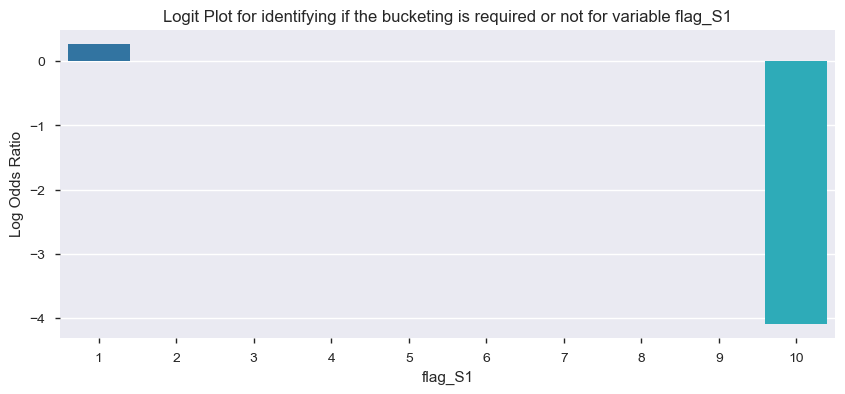

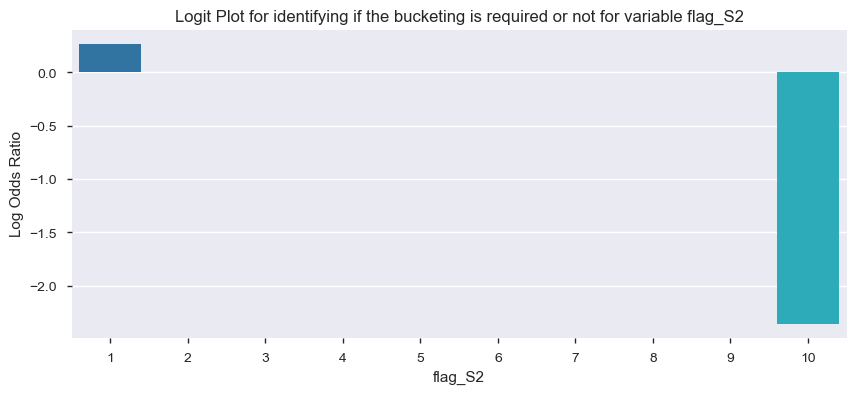

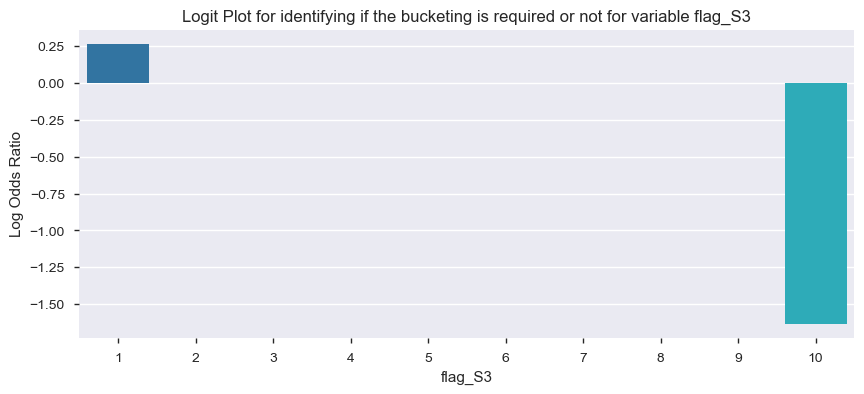

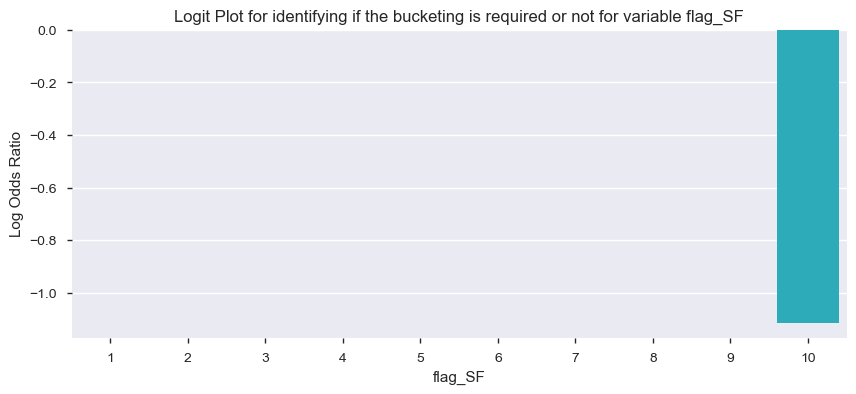

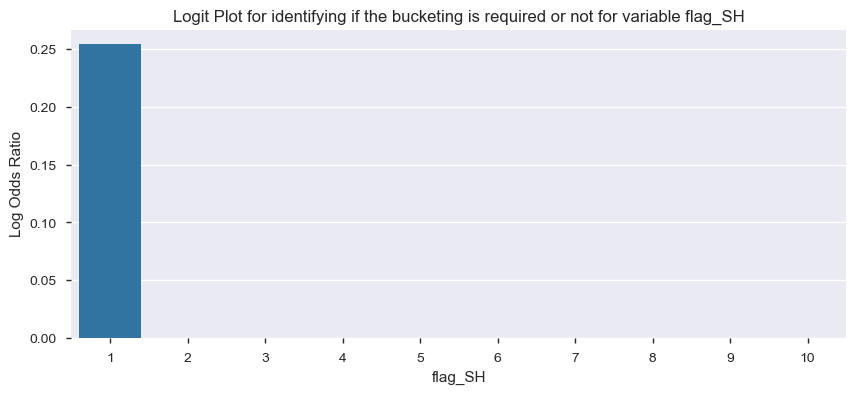

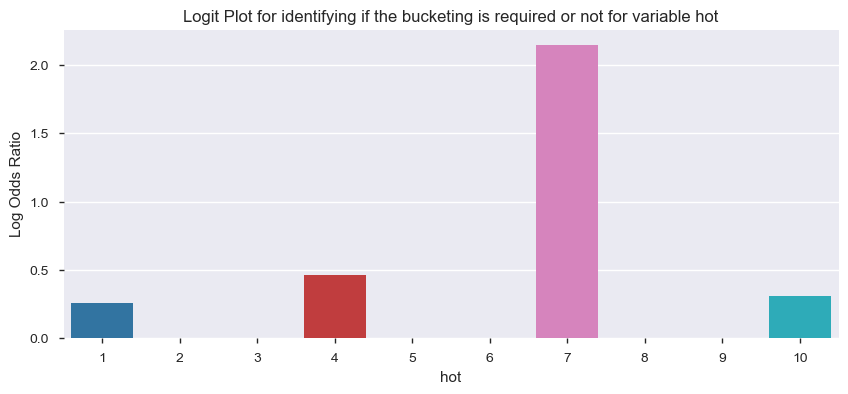

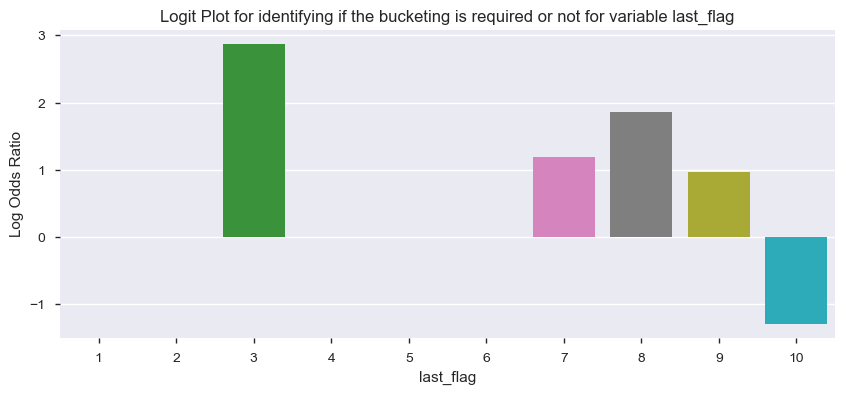

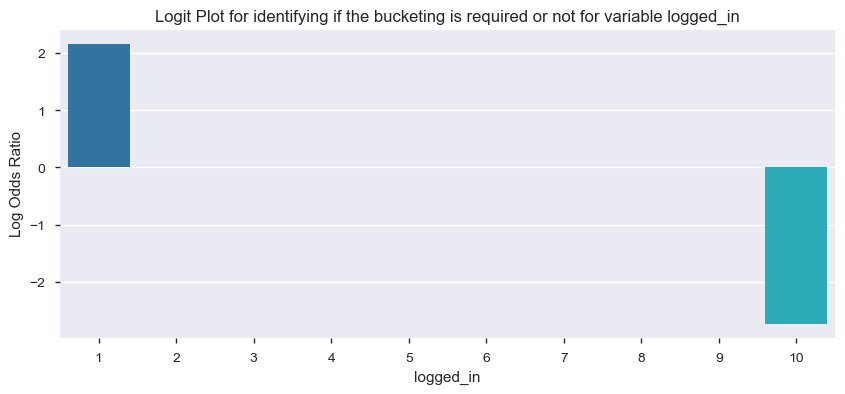

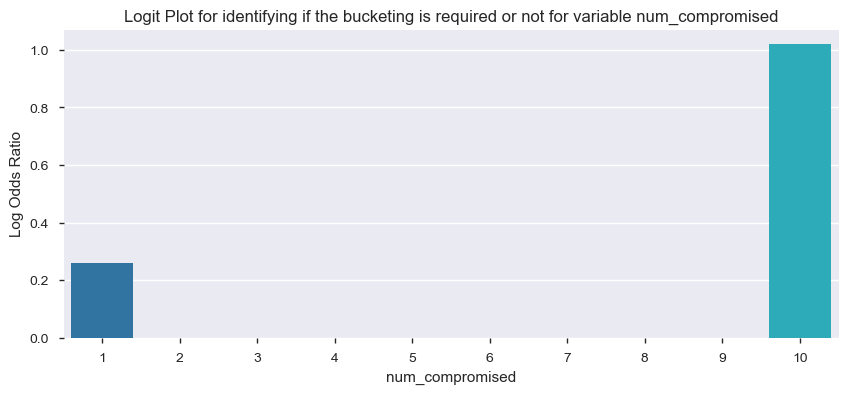

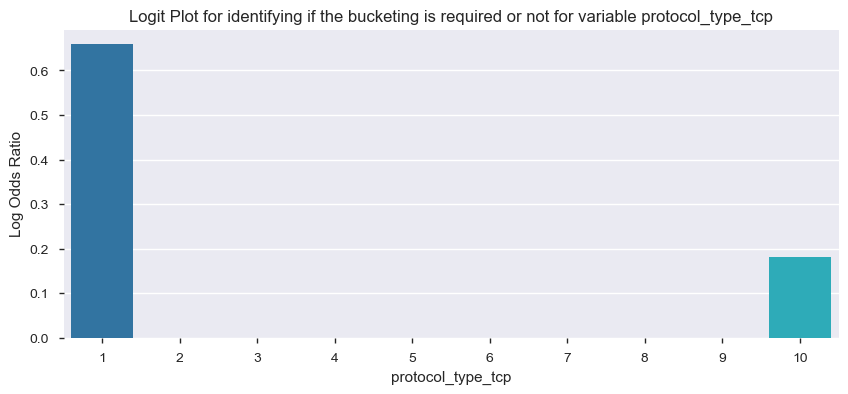

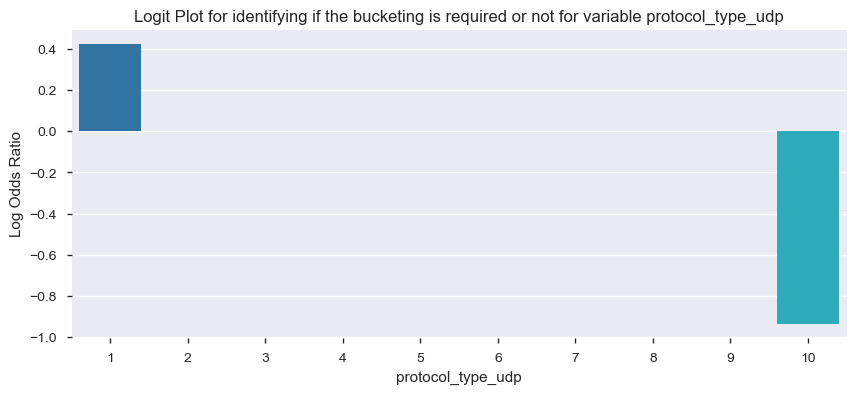

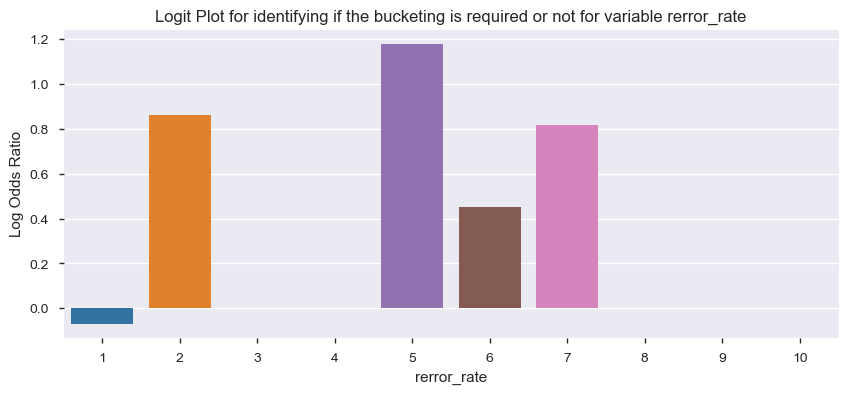

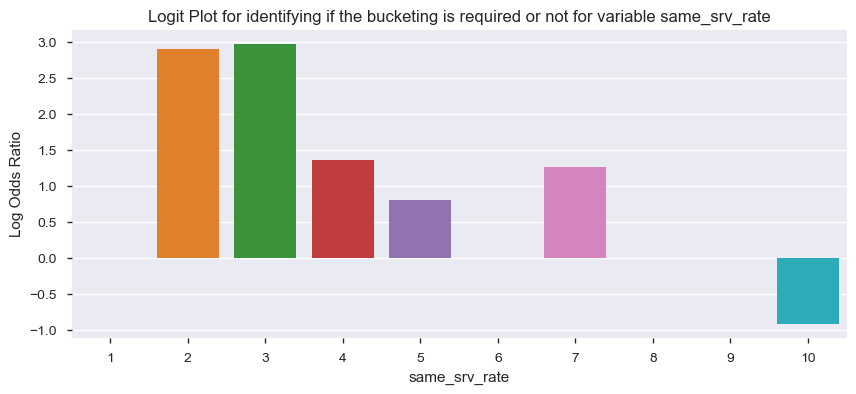

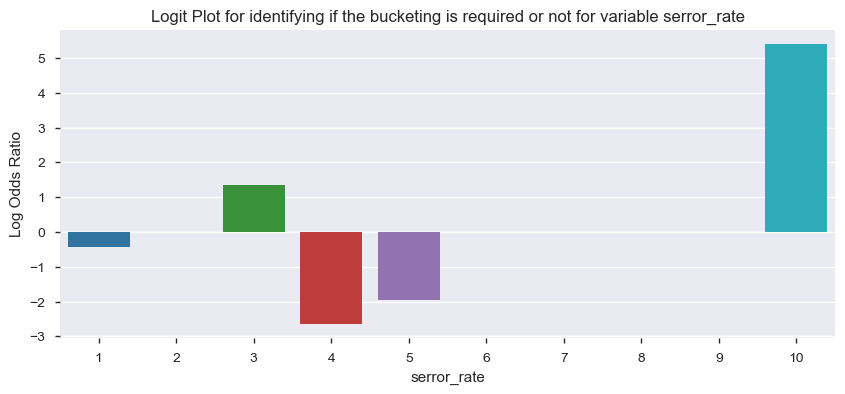

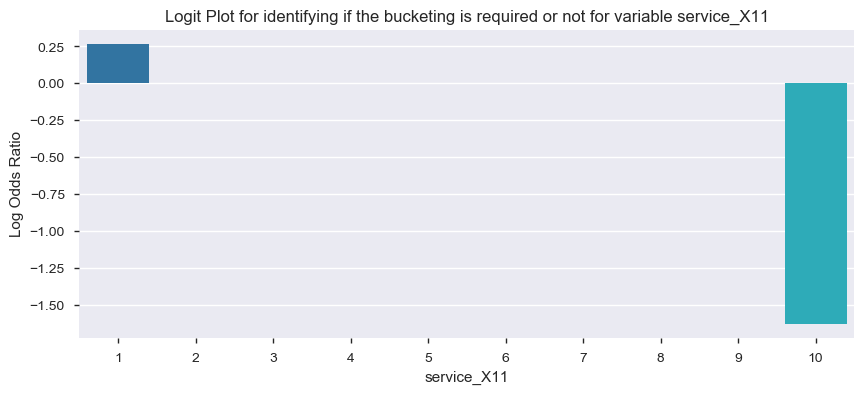

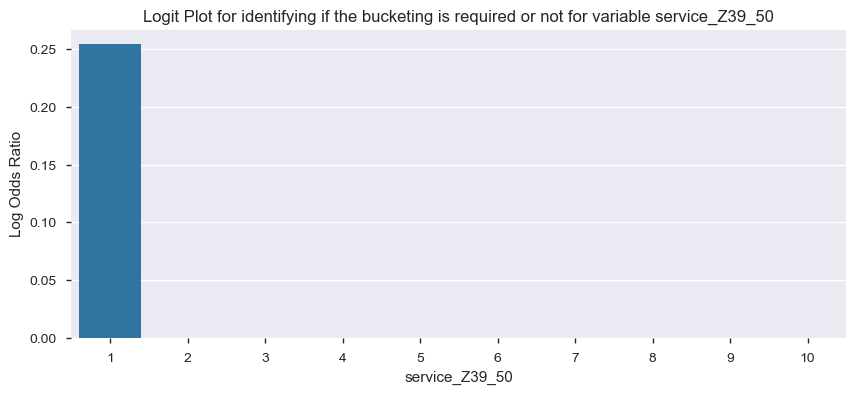

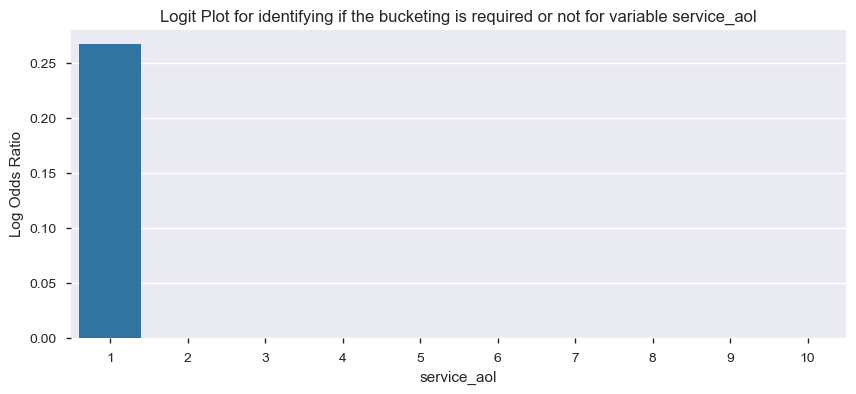

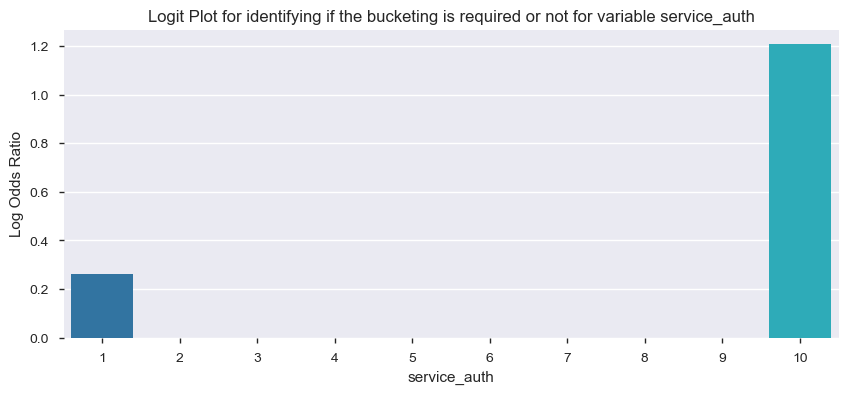

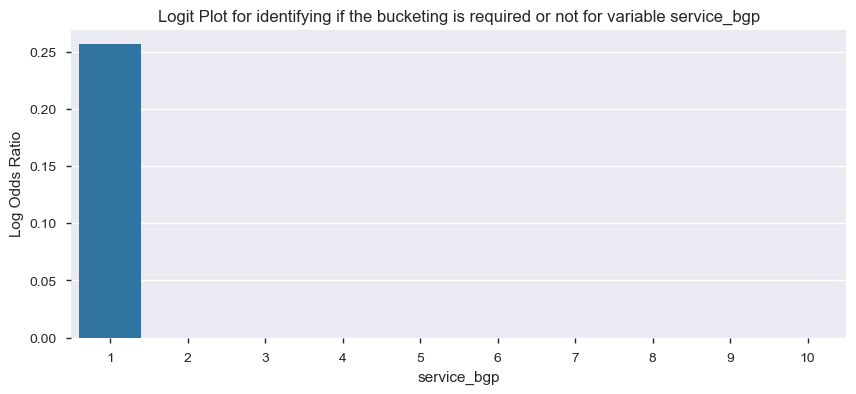

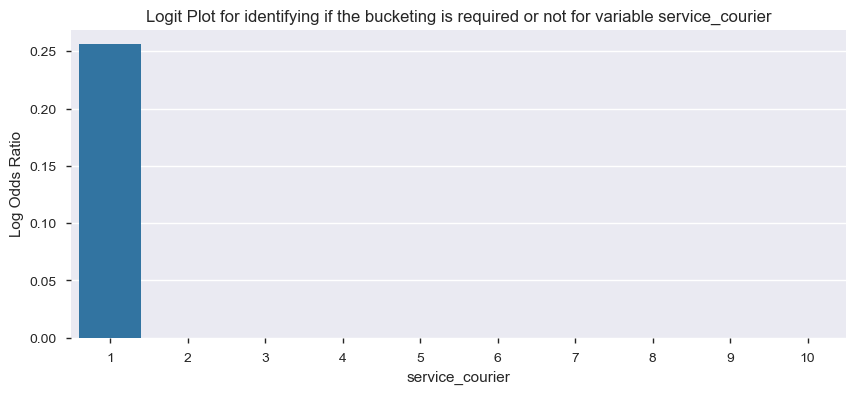

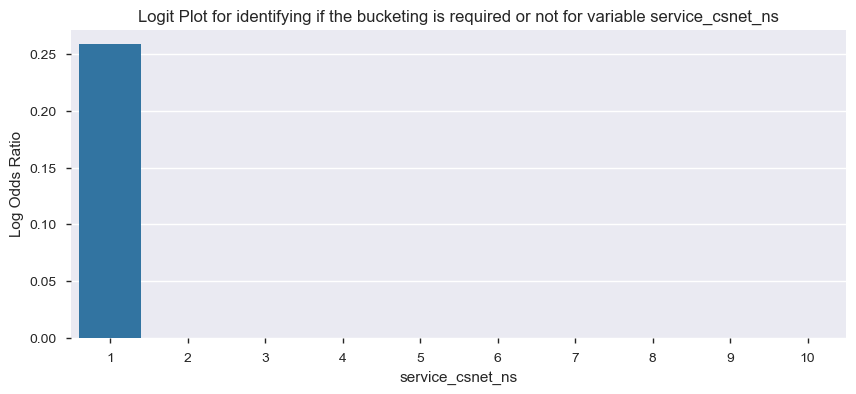

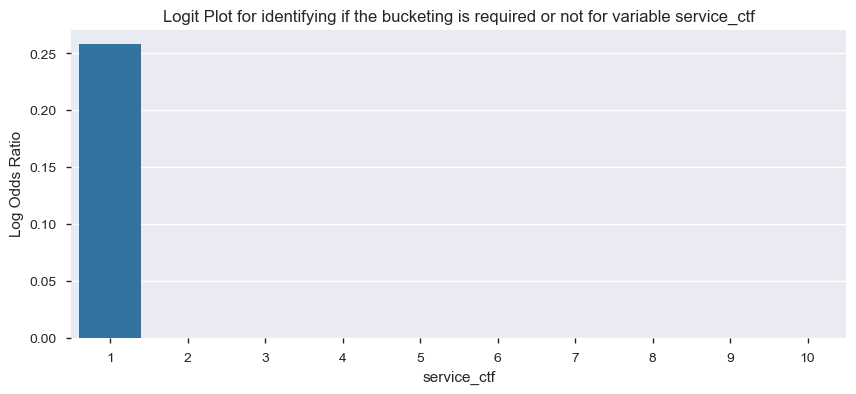

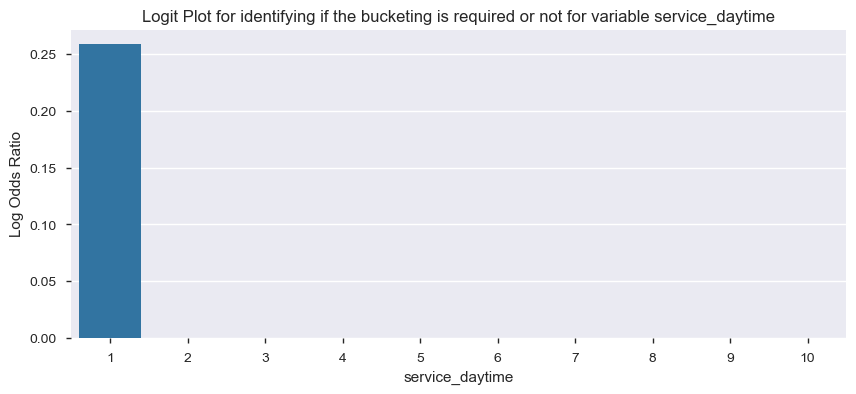

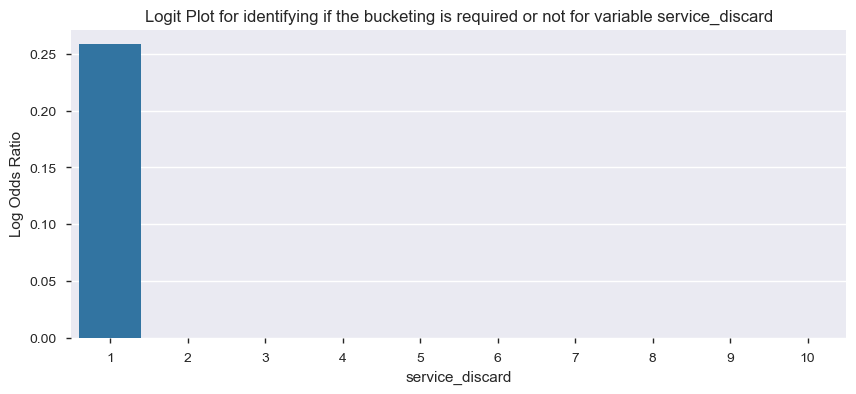

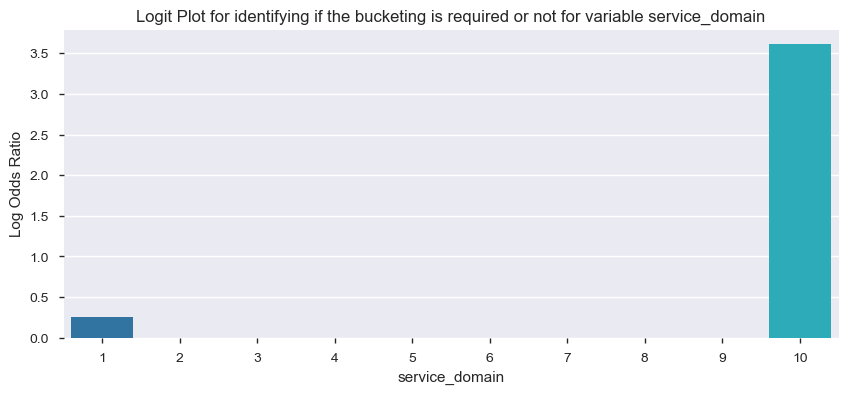

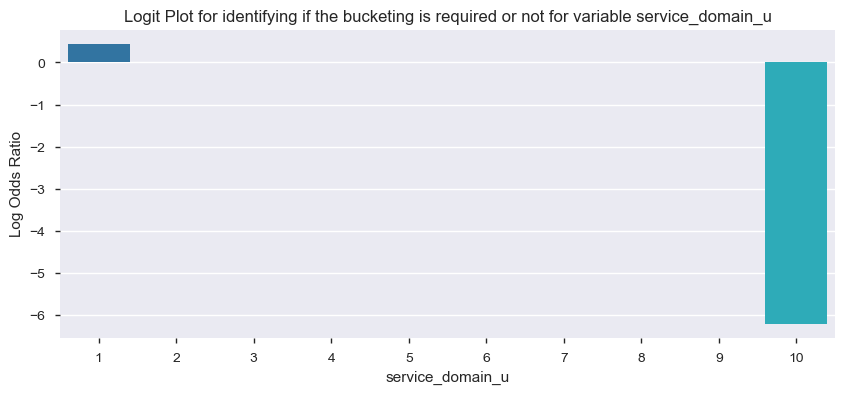

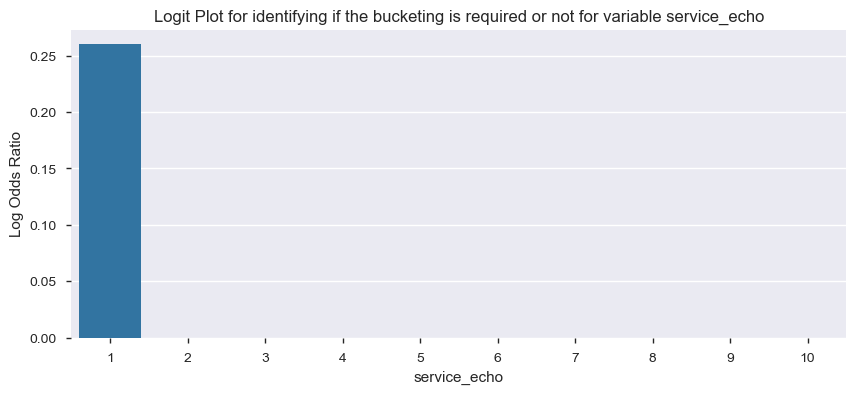

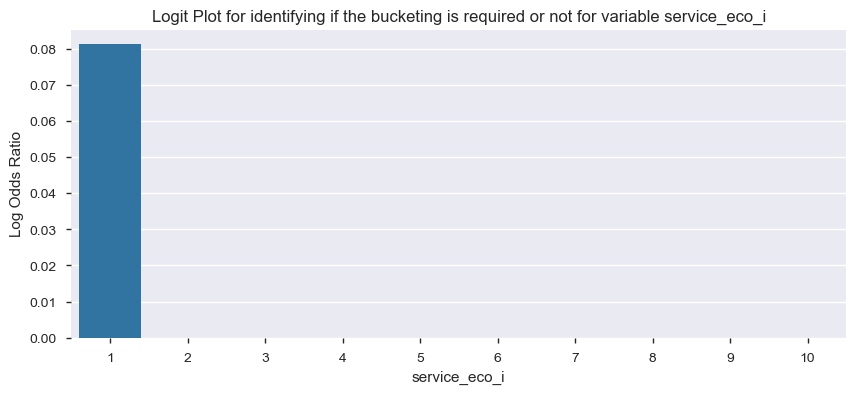

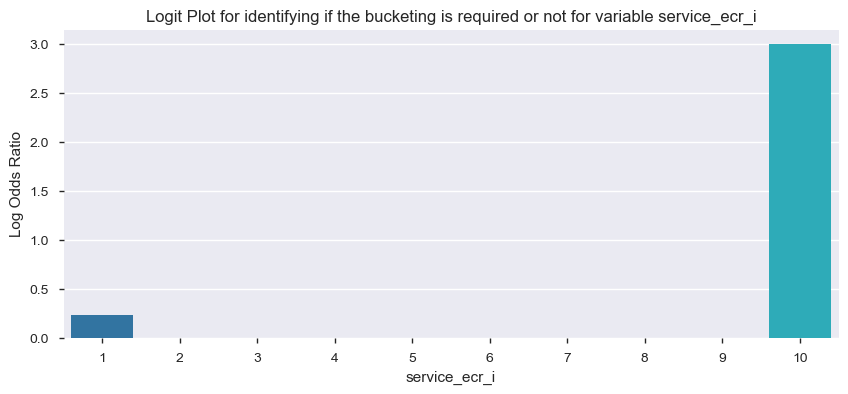

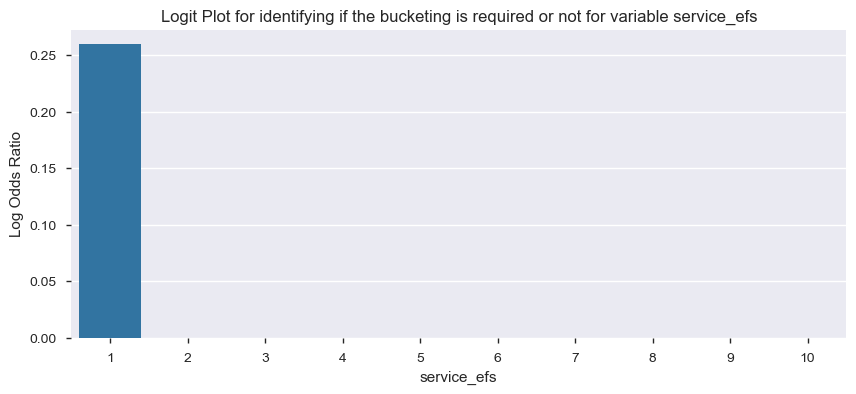

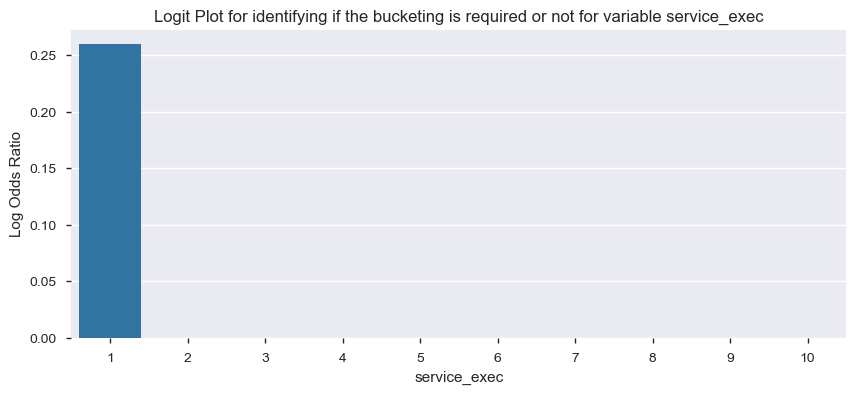

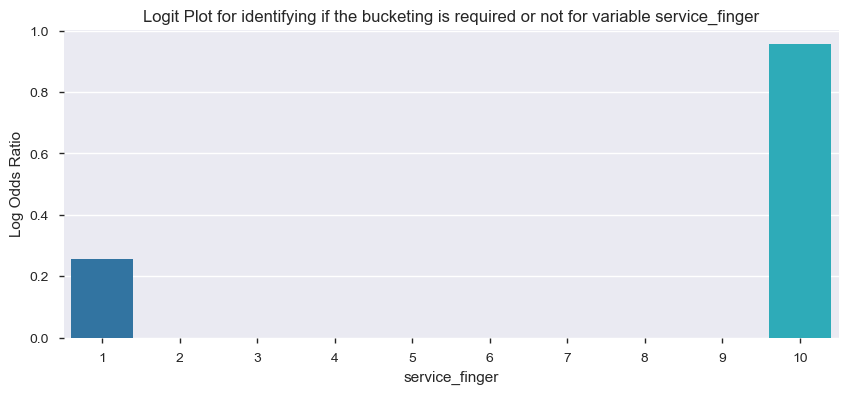

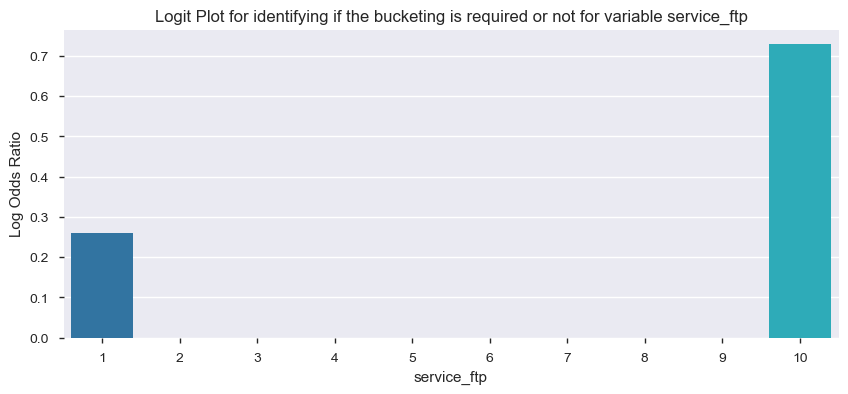

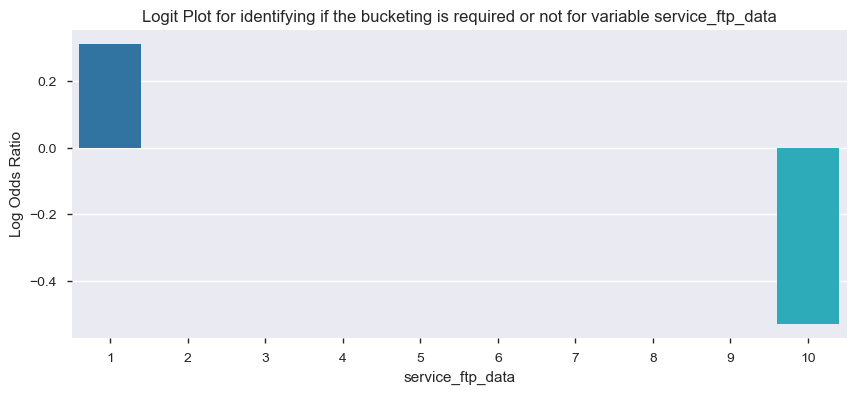

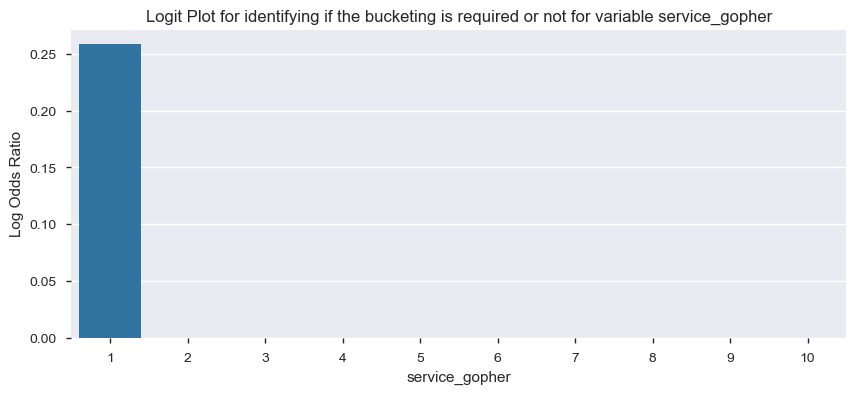

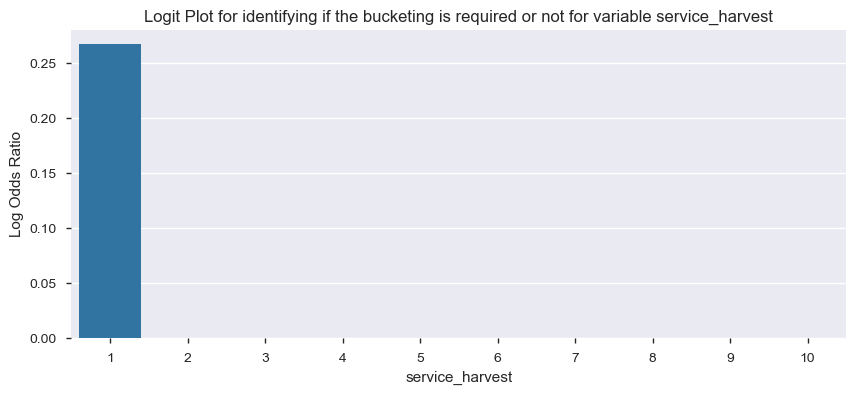

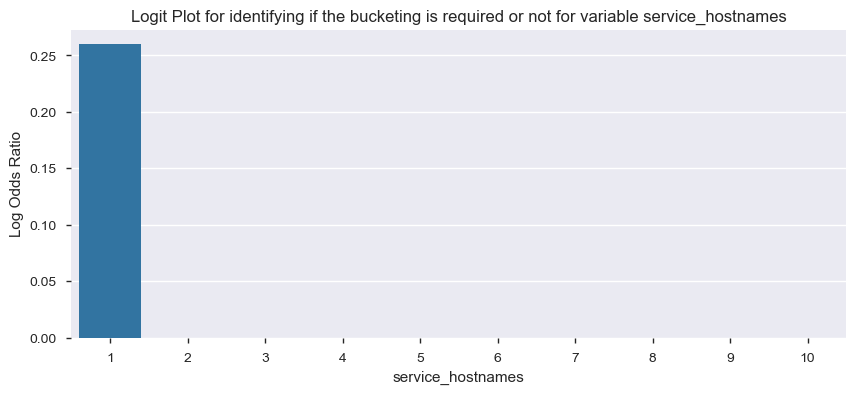

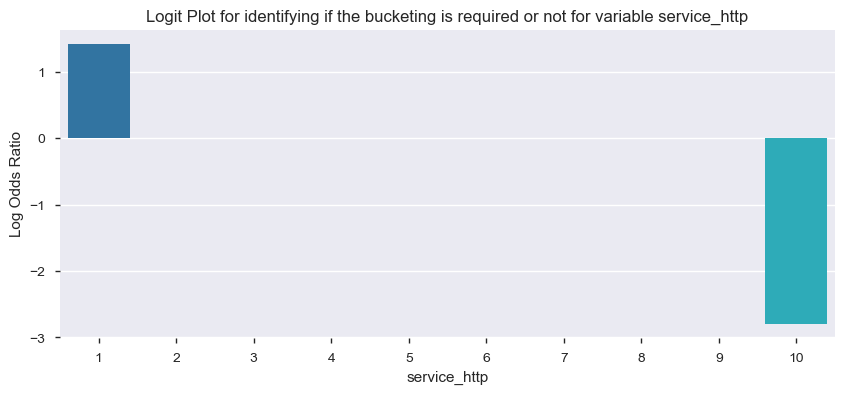

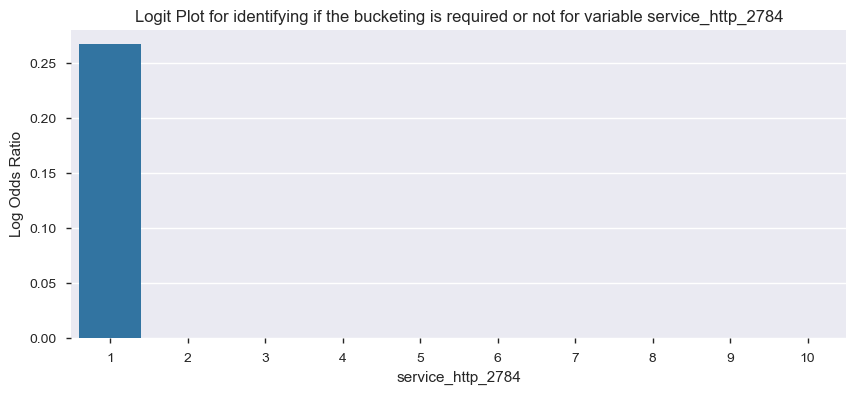

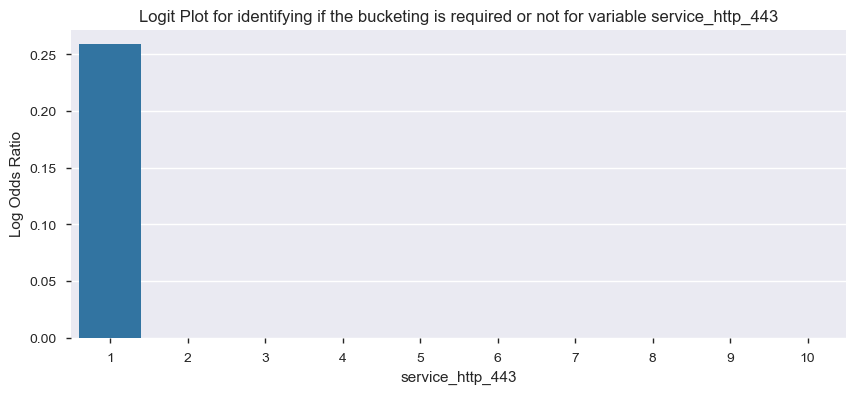

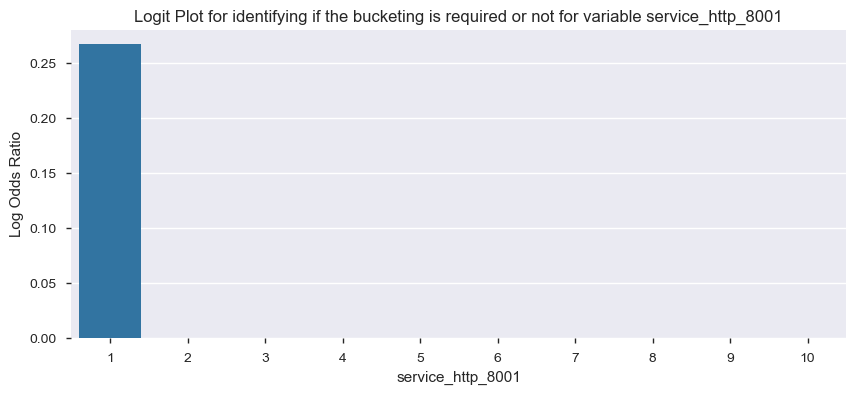

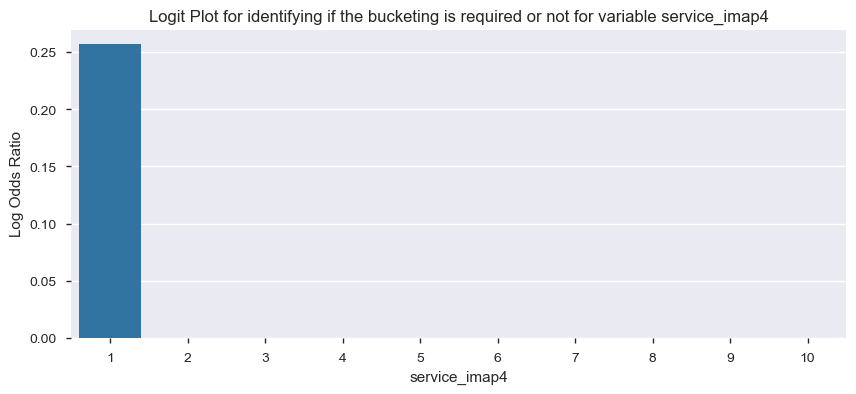

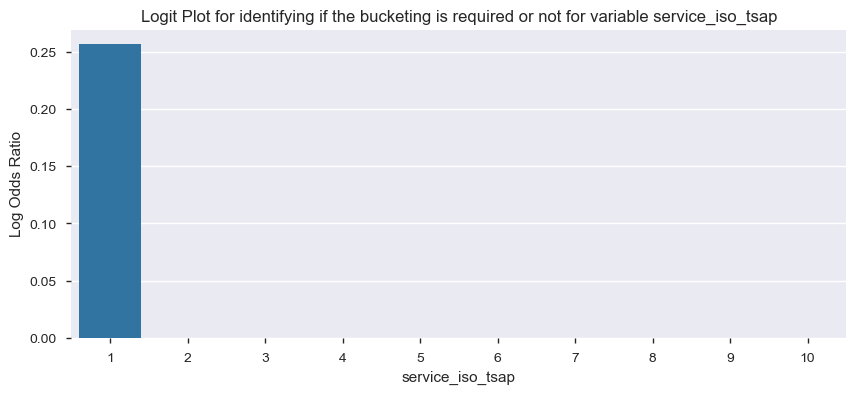

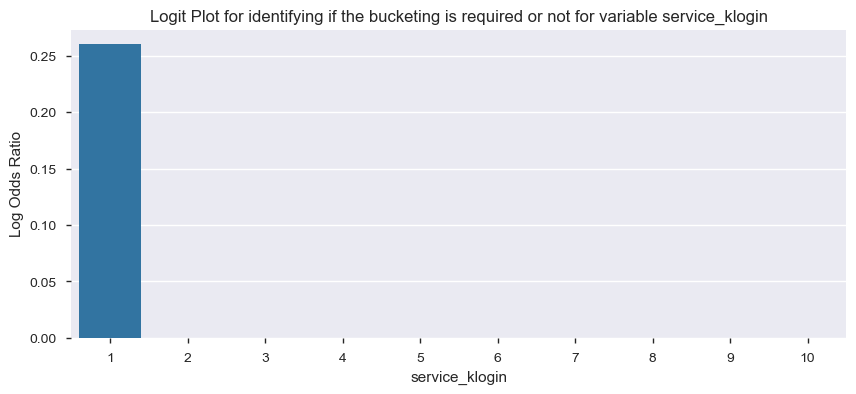

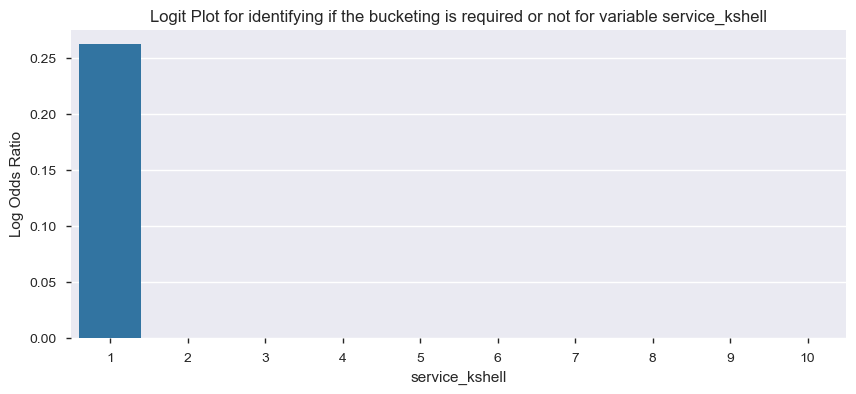

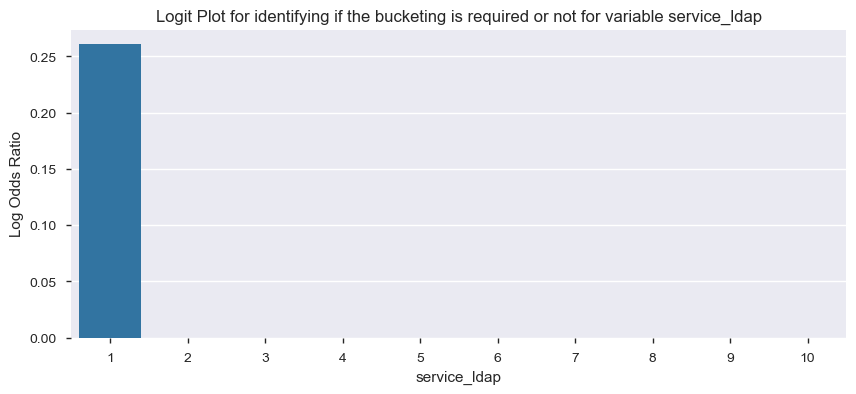

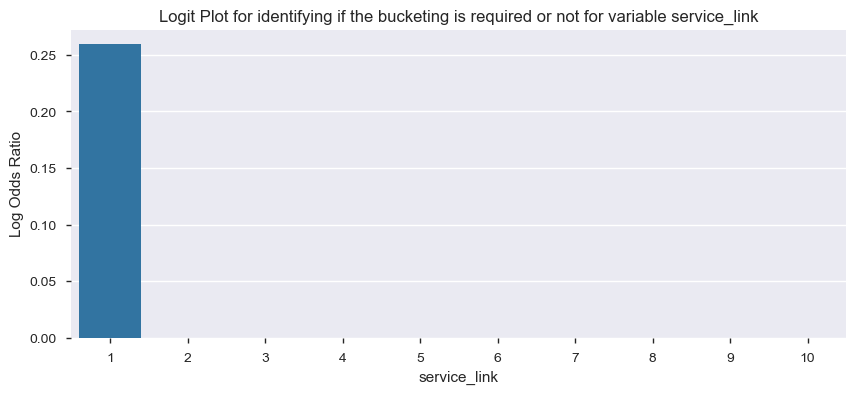

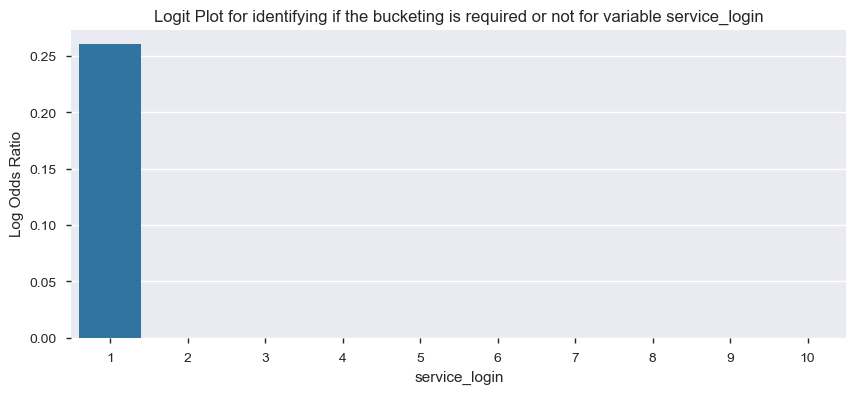

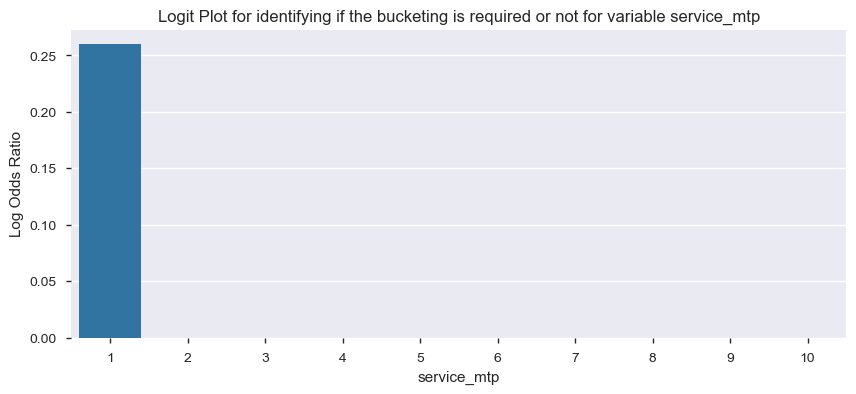

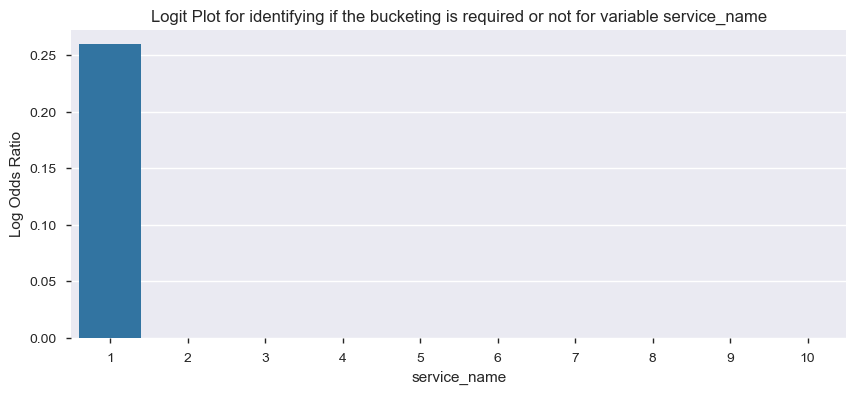

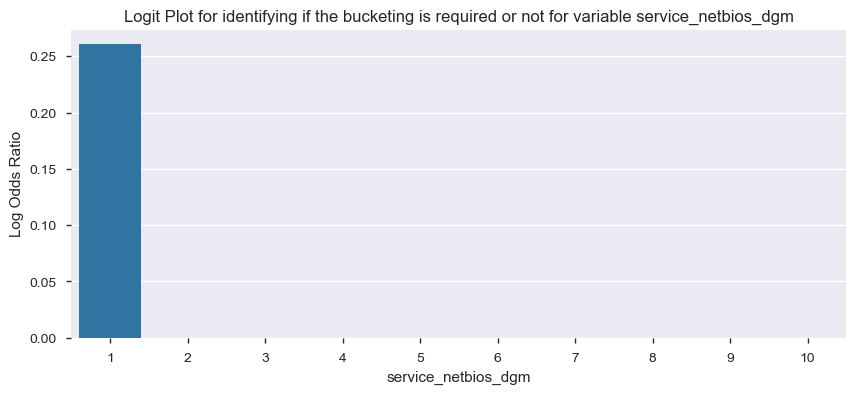

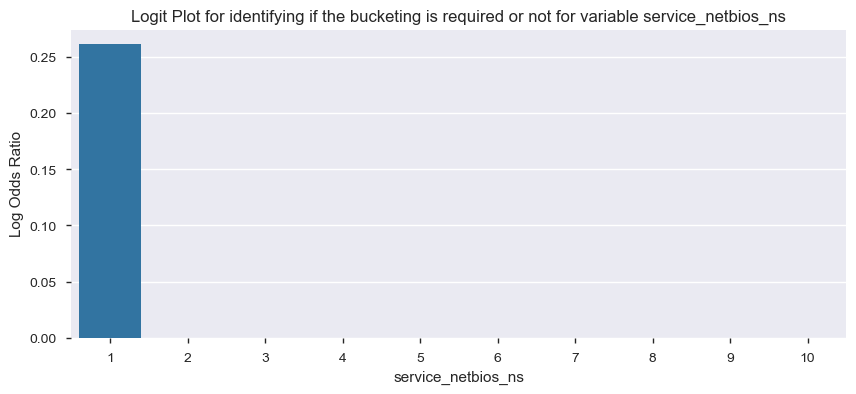

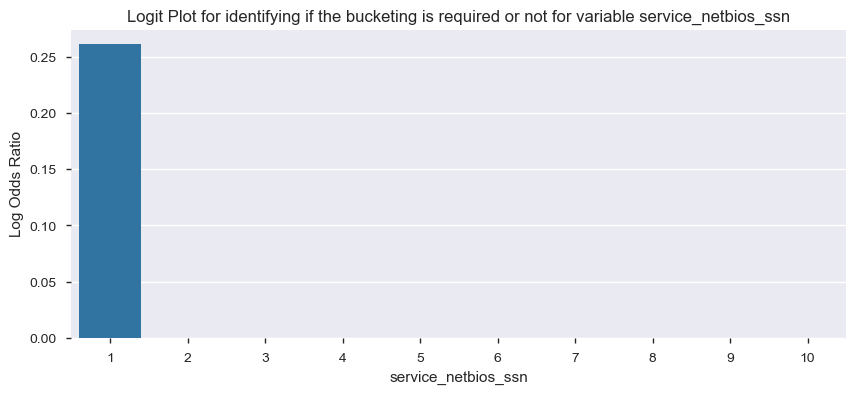

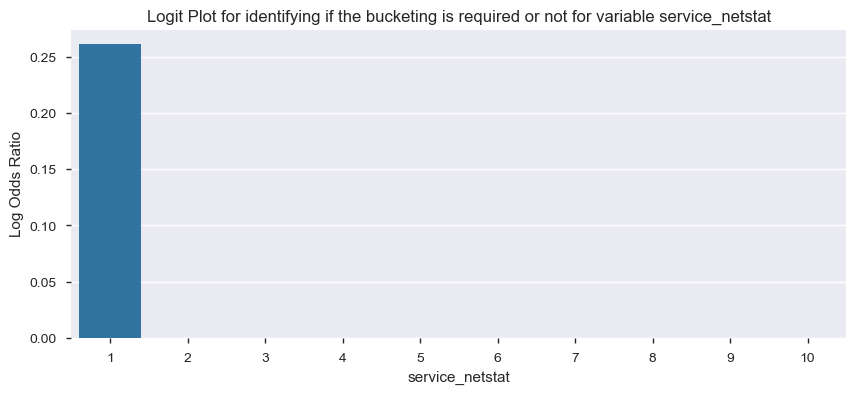

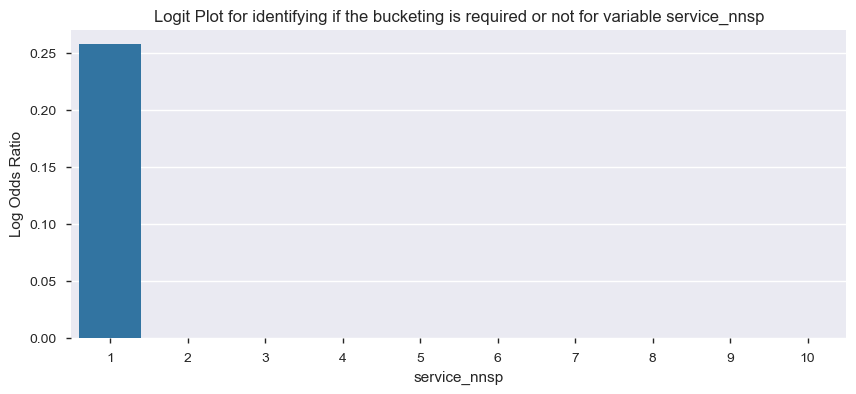

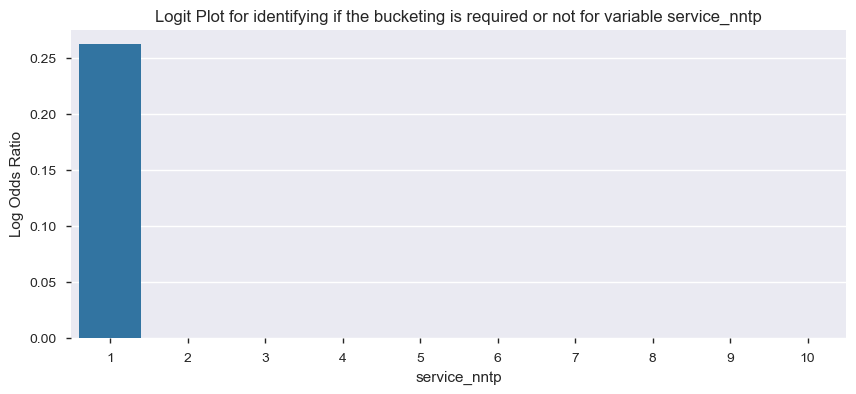

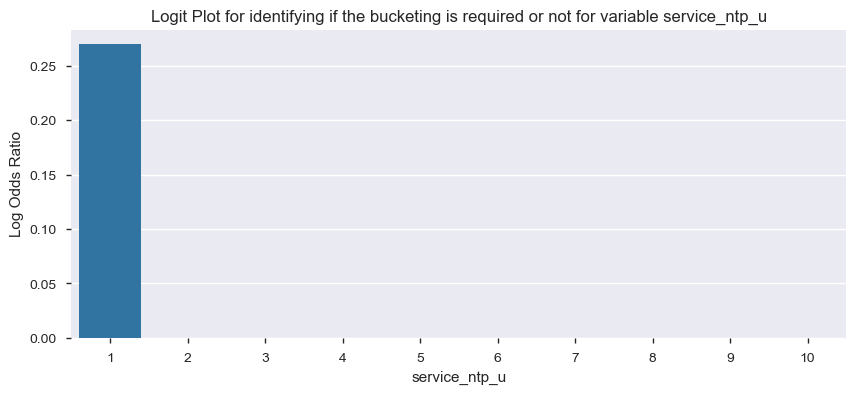

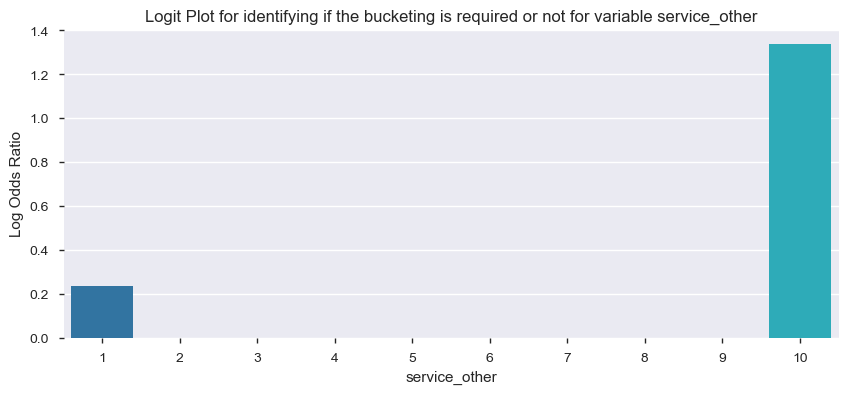

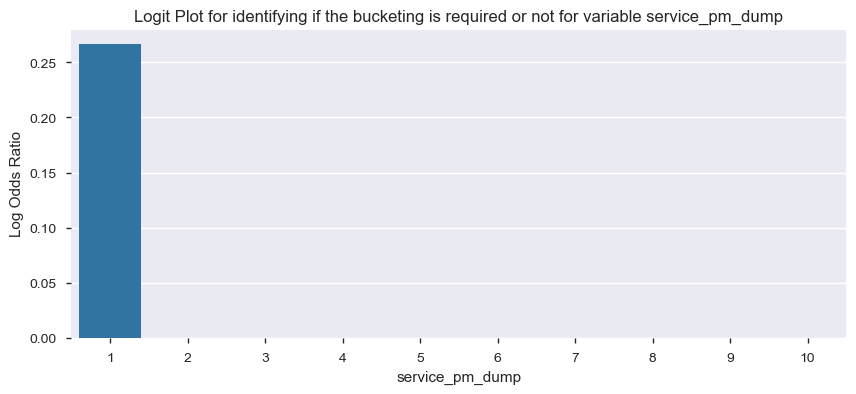

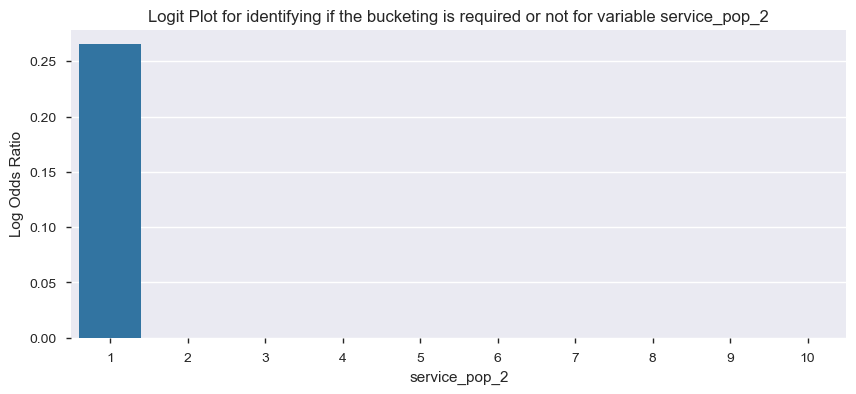

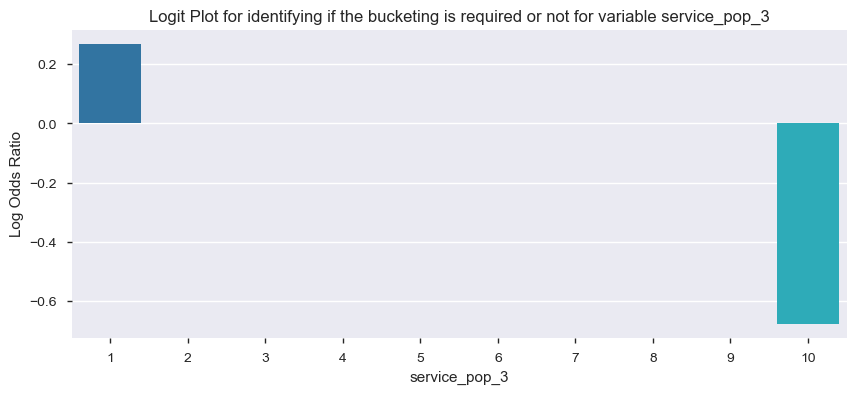

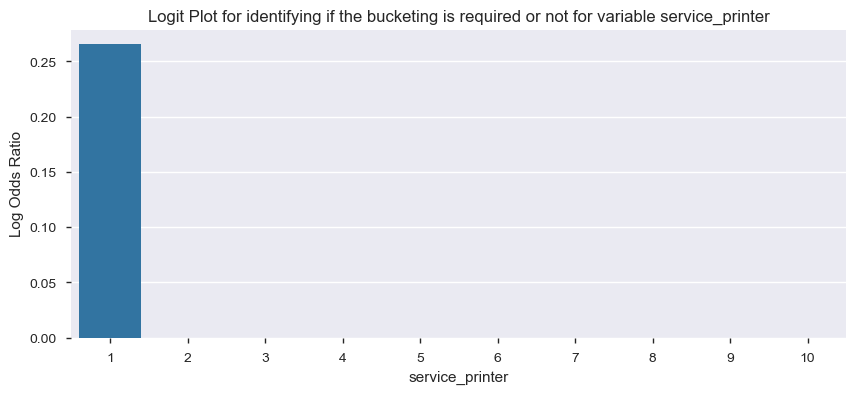

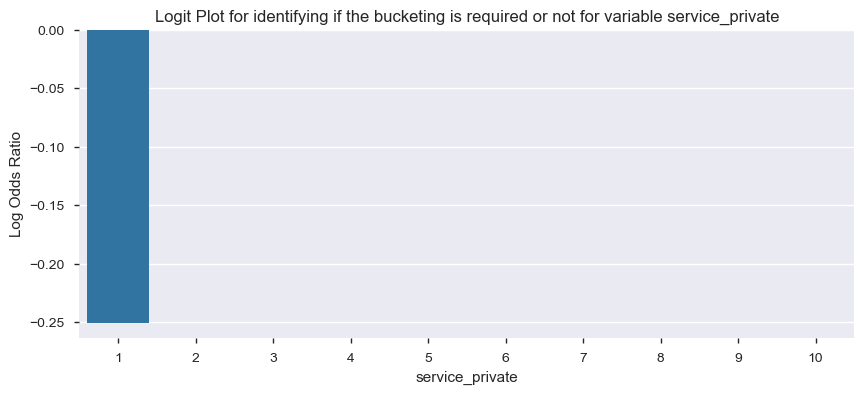

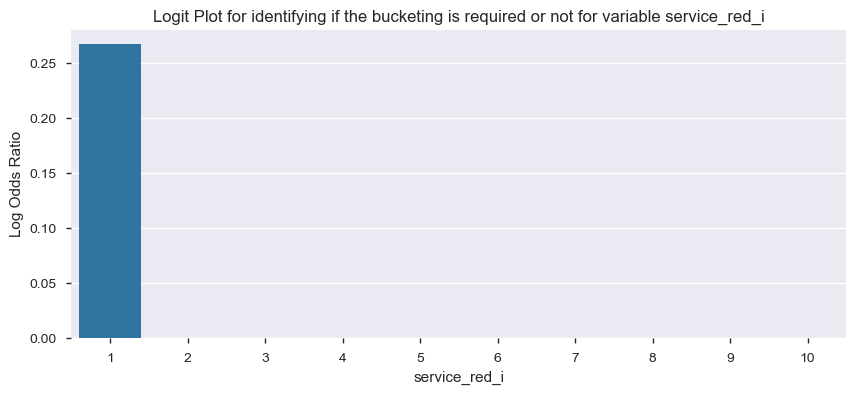

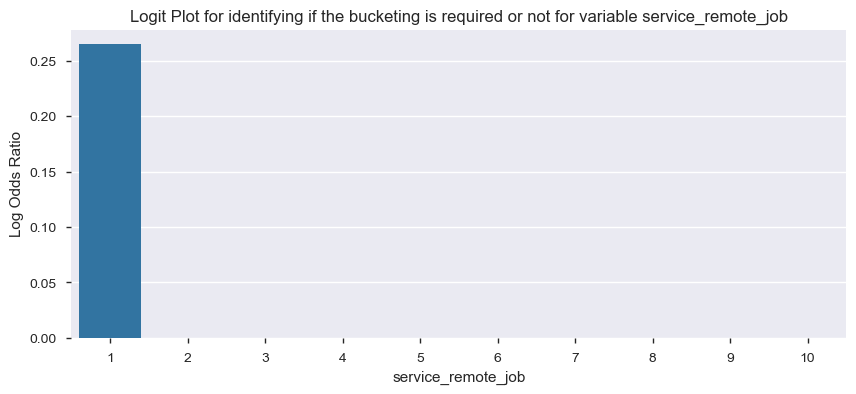

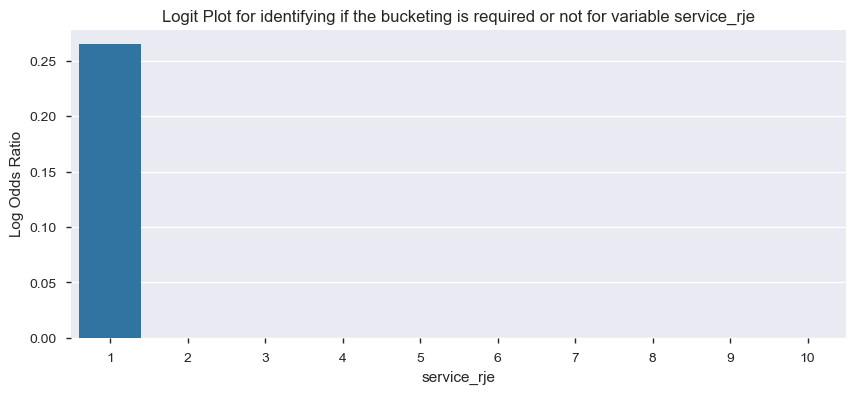

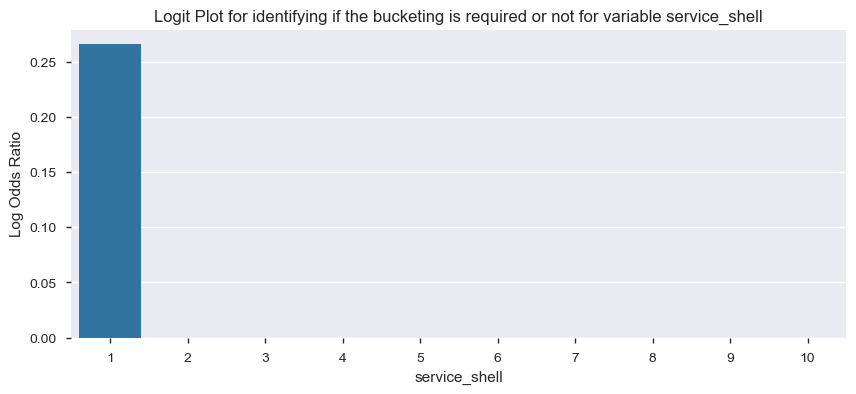

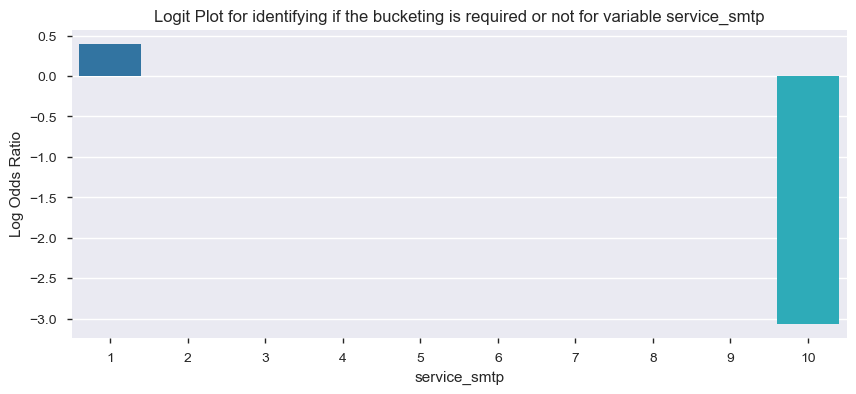

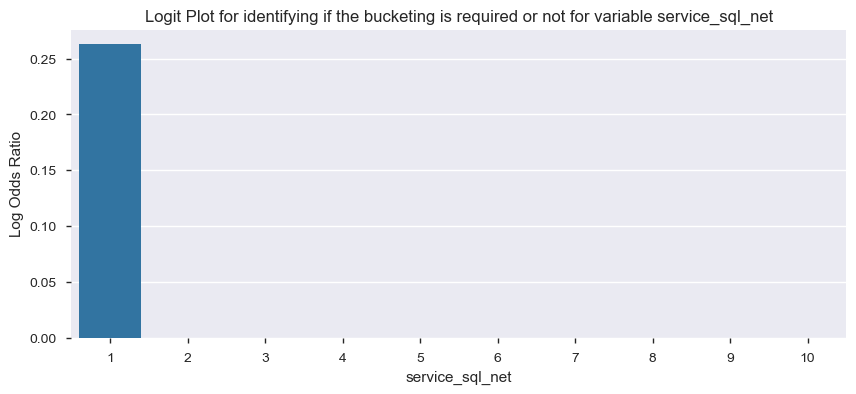

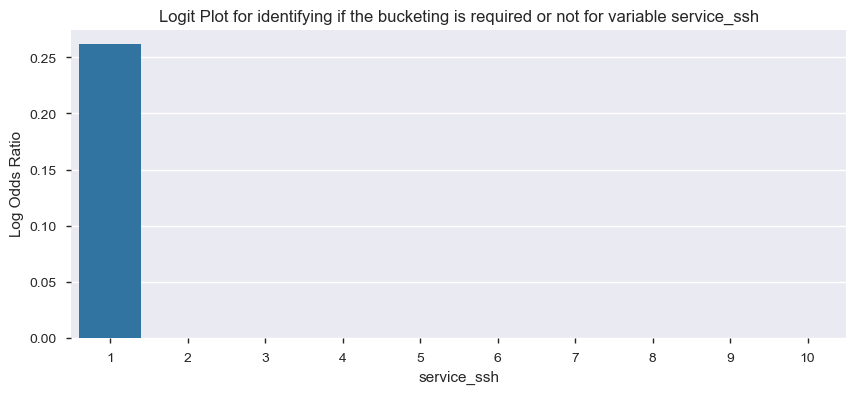

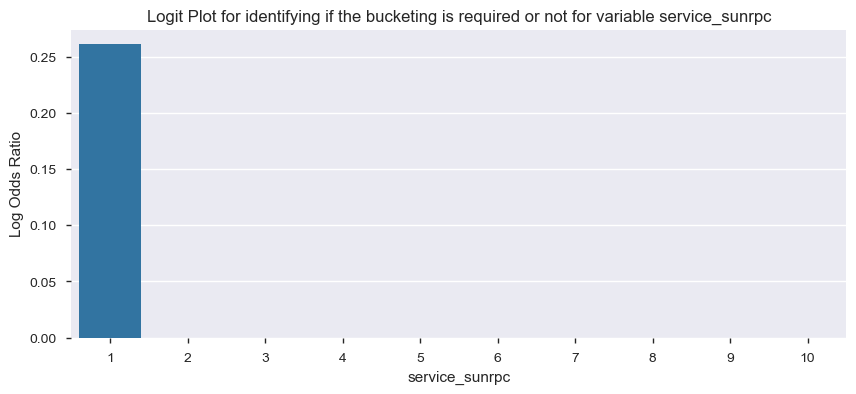

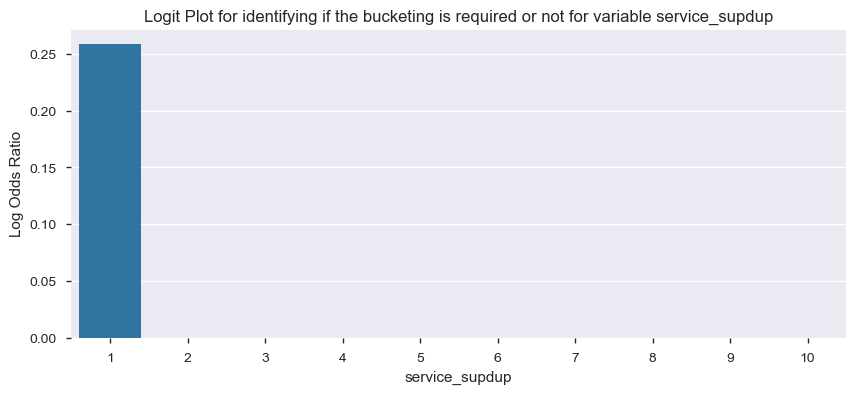

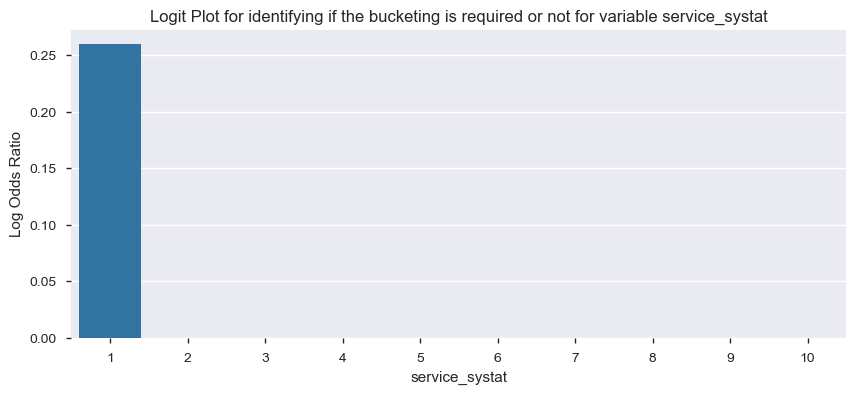

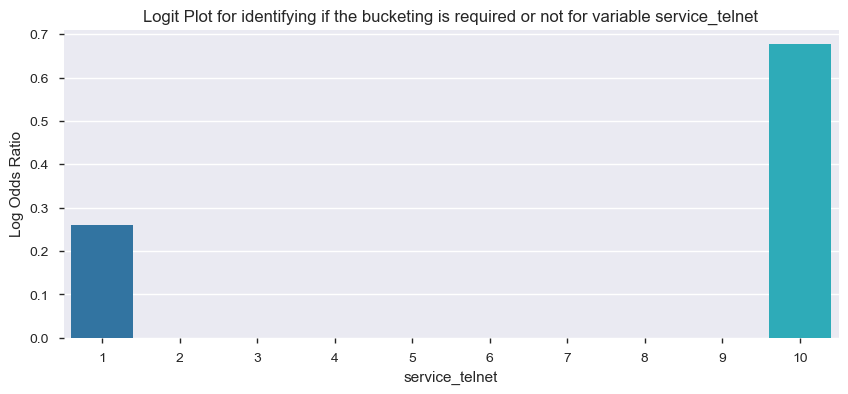

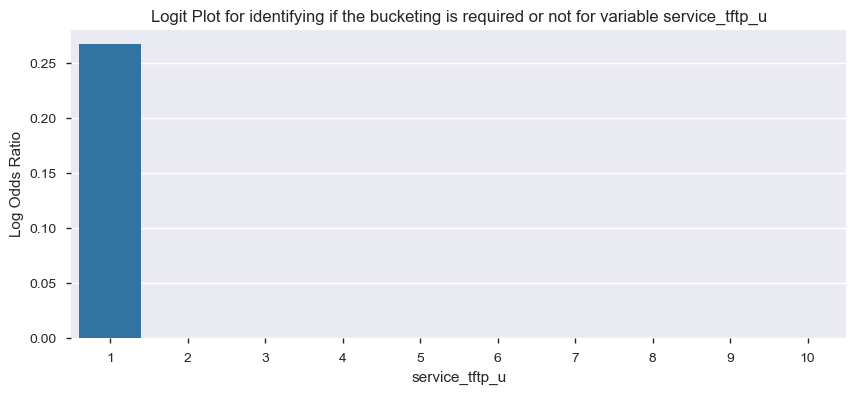

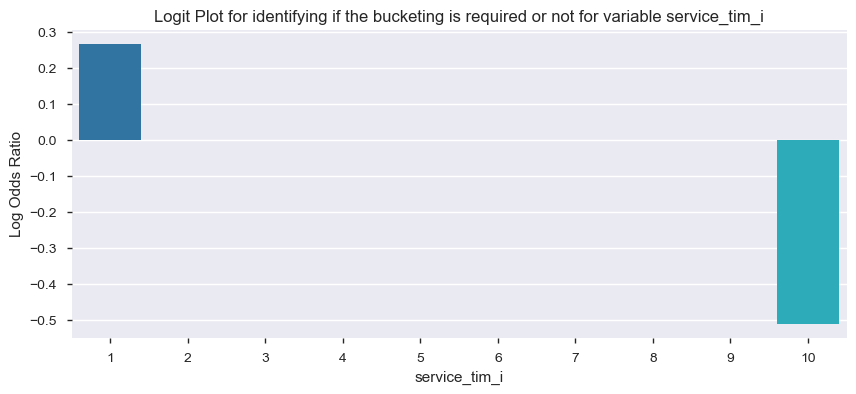

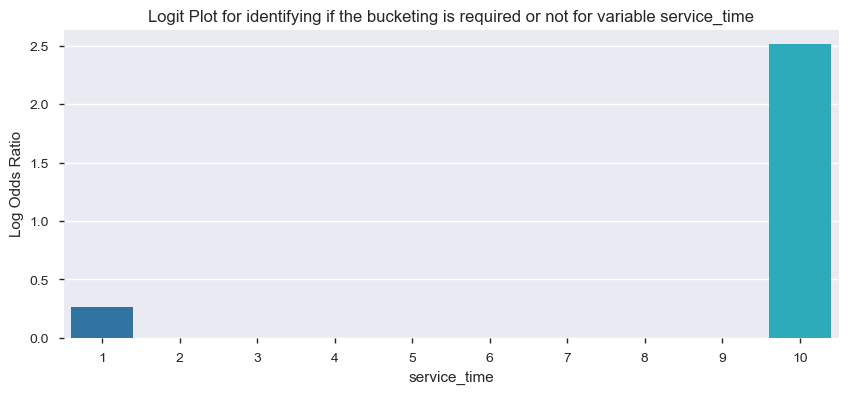

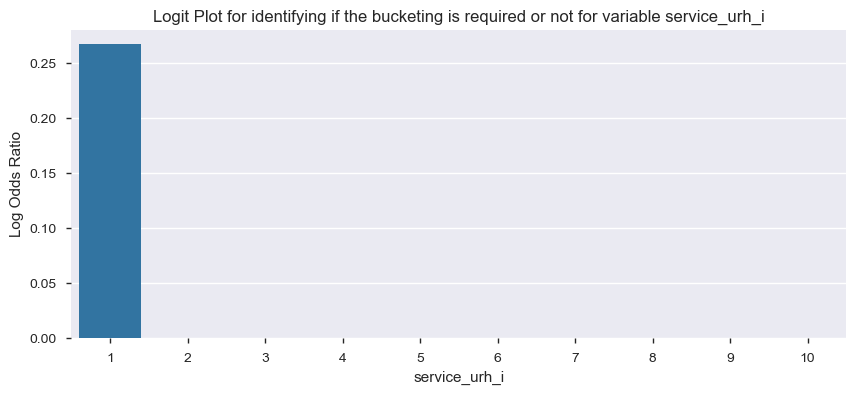

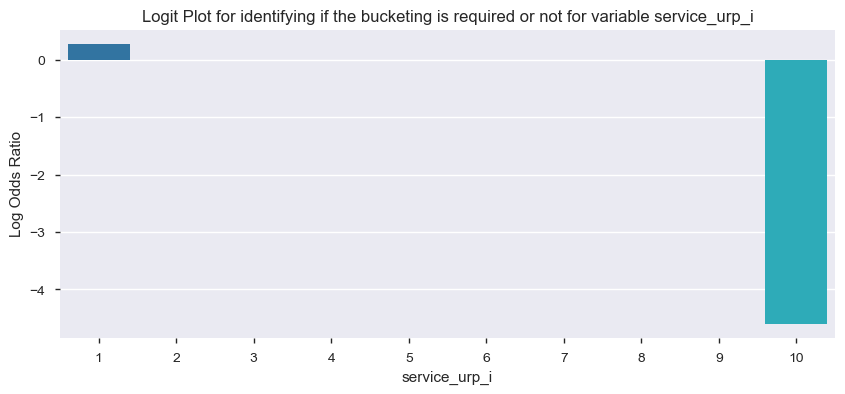

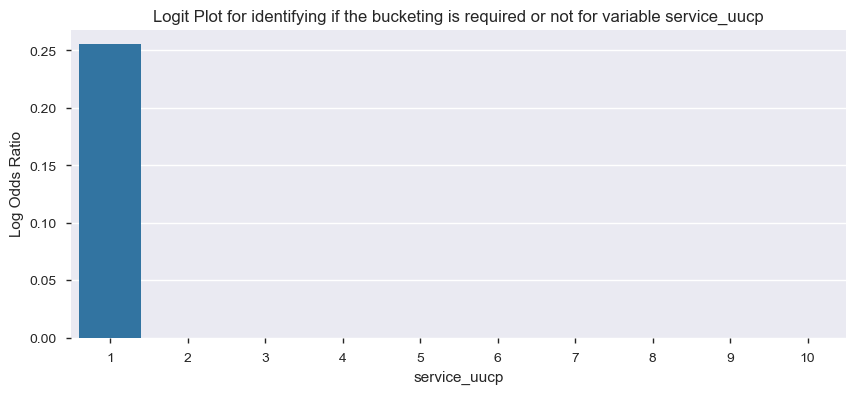

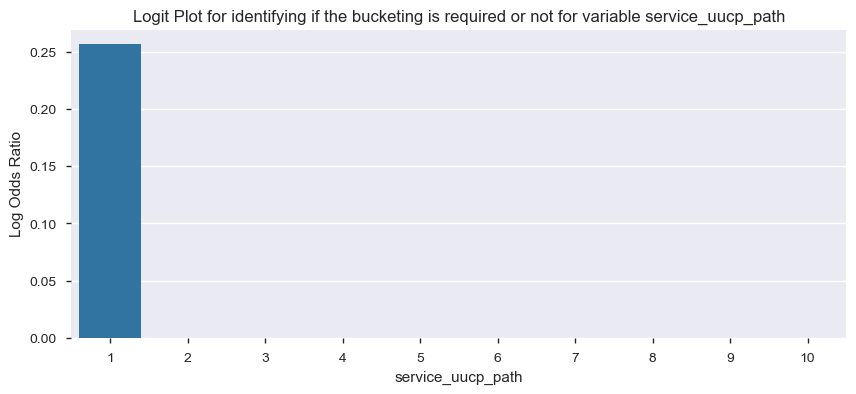

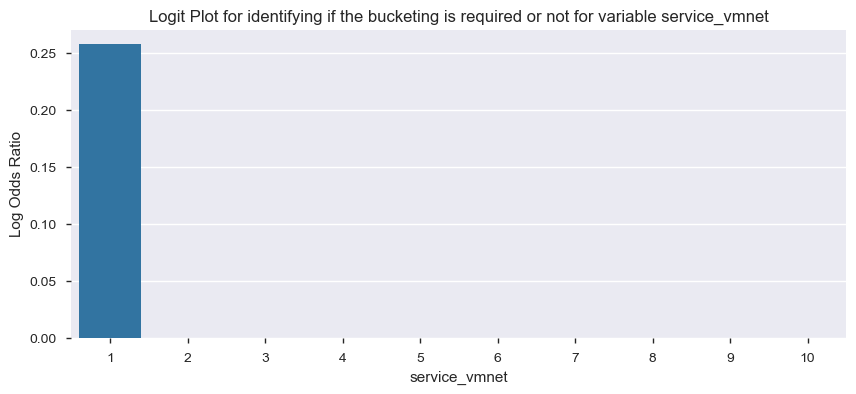

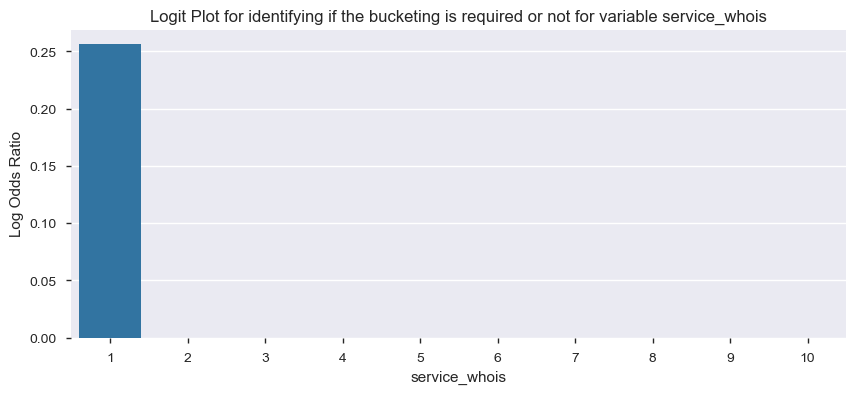

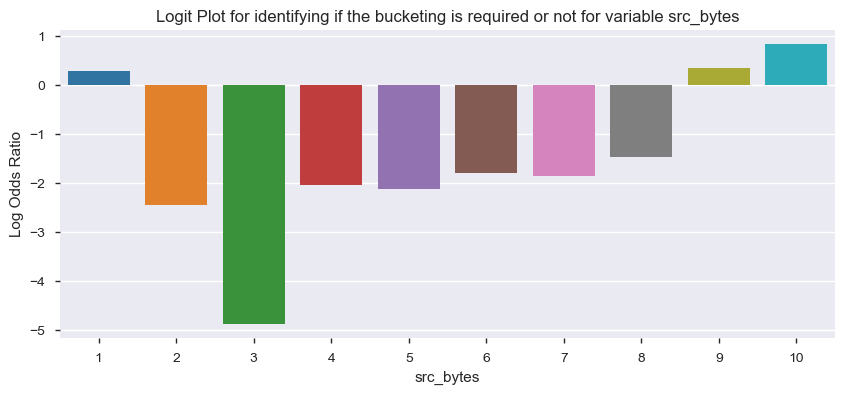

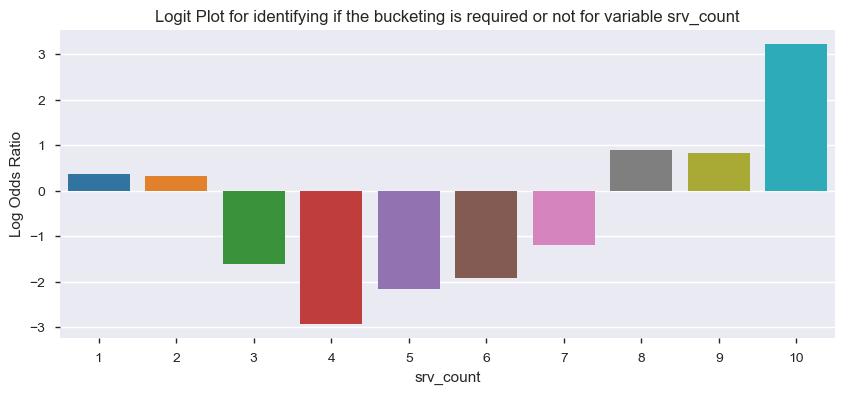

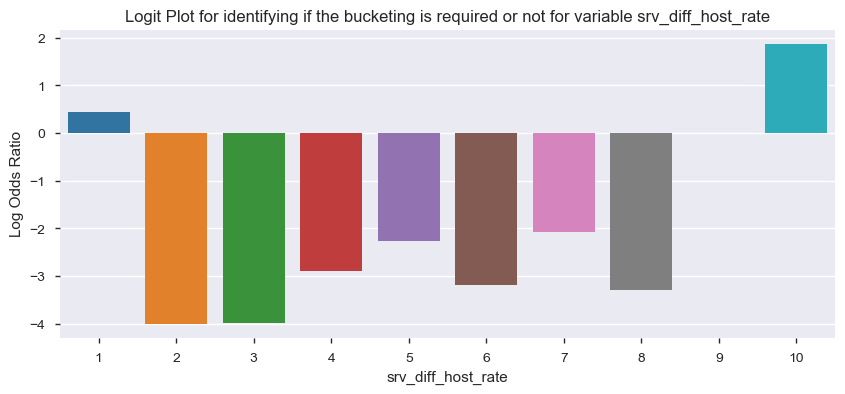

In [95]:
import sys
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'figure.max_open_warning': 0})     # to stop high memory usage warning
np.seterr(divide = 'ignore')                            # to stop divide by zero warning

bp = PdfPages('WOE Plots.pdf')

for num_variable in train_new.columns.difference(['attack_class']):
    binned = pd.cut(train_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = train_new.groupby(binned)['attack_class'].sum() / (train_new.groupby(binned)['attack_class'].count()-train_new.groupby(binned)['attack_class'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

#### Variable Reduction using Recursive Feature Elimination (RFE)

In [96]:
X = train_new[train_new.columns.difference(['attack_class'])]
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, train_new['attack_class'] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vic

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vic

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vic

[False False False False  True False False False  True  True  True False
 False  True  True False  True  True False  True  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False]
[ 11  40  12  15   1   3  45  39   1   1   1  43   2   1   1  14   1   1
  50   1   1  24  95   9 109  96   7   4  29  97  28  86  33  36  35  22
   1  42  92  49  13  34  21  38  27   1   6  31  17  23  16  91  47 104
  54  52  53  66  56  76  70  8

In [97]:
# capturing the important variables
RFE_features=X.columns[rfe.get_support()]
RFE_features

Index(['attack_ipsweep', 'attack_neptune', 'attack_nmap', 'attack_normal',
       'attack_pod', 'attack_portsweep', 'attack_satan', 'attack_smurf',
       'attack_teardrop', 'attack_warezclient', 'flag_S0', 'num_compromised',
       'service_ecr_i', 'service_http', 'service_telnet'],
      dtype='object')

#### Variable reduction using Select K-Best technique

In [98]:
X = train_new[train_new.columns.difference(['attack_class'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_class'] )

In [99]:
X_new.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [100]:
X_new.scores_

array([1.34064116e+02, 3.56884766e+01, 2.37277235e+02, 4.90832543e+01,
       2.23882592e+04, 1.56916475e+01, 4.01526990e+01, 3.12249574e+01,
       3.49978365e+05, 7.54266680e+03,            inf, 1.33779097e+01,
       1.78386176e+01, 1.75924658e+02, 1.69864681e+04, 4.46176249e+01,
       2.26844805e+04, 2.44673212e+03, 8.91790430e+00, 7.92699452e+02,
       4.26678275e+03, 8.93056079e+01, 4.22698233e+04, 7.97231867e+03,
       5.76300314e+03, 1.85803691e+04, 2.24895262e+04, 2.75241067e+04,
       6.70321129e+04, 6.92428333e+04, 1.83320102e+04, 2.42923569e+03,
       2.92634050e+03, 6.10523702e+02, 4.62953538e+02, 1.01592004e+04,
       1.10260381e+05, 1.52322078e+02, 4.14807873e+01, 1.57821049e+01,
       1.10776633e+05, 1.21395725e+03, 1.29054963e+02, 3.23685410e+04,
       5.75770350e+04, 2.97251093e+02, 5.23057641e+03, 3.77796192e+03,
       8.06829774e+03, 1.33879527e+05, 1.02833658e+05, 2.34824947e+01,
       7.35338278e+02, 8.91790430e+00, 2.91628764e+02, 5.98590866e+02,
      

In [101]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

#### Variance Inflation Factor assessment

In [102]:
X = pd.concat([train_new[train_new.columns.difference(['attack_class'])],train_new['attack_class']], axis=1)
features = "+".join(train_new.columns.difference(['attack_class']))
X.head()

attack_buffer_overflow  attack_ftp_write  attack_guess_passwd  attack_imap  \
0                       0                 0                    0            0   
1                       0                 0                    0            0   
2                       0                 0                    0            0   
3                       0                 0                    0            0   
4                       0                 0                    0            0   

   attack_ipsweep  attack_land  attack_loadmodule  attack_multihop  \
0               0            0                  0                0   
1               0            0                  0                0   
2               0            0                  0                0   
3               0            0                  0                0   
4               0            0                  0                0   

   attack_neptune  attack_nmap  ...  service_urh_i  service_urp_i  \
0               0            0  ...              0              0   
1               1            0  ...              0              0   
2               0            0  ...              0              0   
3               0            0  ...              0              0   
4               1            0  ...              0              0   

   service_uucp  service_uucp_path  service_vmnet  service_whois  src_bytes  \
0             0                  0              0              0        146   
1             0                  0              0              0          0   
2             0                  0              0              0        232   
3             0                  0              0              0        199   
4             0                  0              0              0          0   

   srv_count  srv_diff_host_rate  attack_class  
0          1                0.00           0.0  
1          6                0.00           1.0  
2          5                0.00           0.0  
3         32                0.09           0.0  
4         19                0.00           1.0  

[5 rows x 124 columns]

In [103]:
features

'attack_buffer_overflow+attack_ftp_write+attack_guess_passwd+attack_imap+attack_ipsweep+attack_land+attack_loadmodule+attack_multihop+attack_neptune+attack_nmap+attack_normal+attack_perl+attack_phf+attack_pod+attack_portsweep+attack_rootkit+attack_satan+attack_smurf+attack_spy+attack_teardrop+attack_warezclient+attack_warezmaster+count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+duration+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+hot+last_flag+logged_in+num_compromised+protocol_type_tcp+protocol_type_udp+rerror_rate+same_srv_rate+serror_rate+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service

In [104]:
a,b = dmatrices(formula_like='attack_class ~ '+'attack_ipsweep+attack_neptune+attack_nmap+attack_normal+attack_pod+attack_portsweep+attack_satan+attack_smurf+attack_teardrop+attack_warezclient+count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+duration+flag_S0+flag_SF+hot+last_flag+logged_in+rerror_rate+num_compromised+same_srv_rate+service_ecr_i+service_http+service_telnet+serror_rate+src_bytes+srv_count+srv_diff_host_rate',data=train_new,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                     features
0   809.544236                    Intercept
1    13.484919               attack_ipsweep
2   111.482807               attack_neptune
3     5.598297                  attack_nmap
4    98.339622                attack_normal
5     2.465037                   attack_pod
6    10.977962             attack_portsweep
7    12.767145                 attack_satan
8    22.365957                 attack_smurf
9     3.782792              attack_teardrop
10    3.493324           attack_warezclient
11    5.063222                        count
12    2.680071                diff_srv_rate
13    1.378279                    dst_bytes
14    2.447072               dst_host_count
15    3.119955       dst_host_diff_srv_rate
16    2.813599  dst_host_same_src_port_rate
17   13.678769       dst_host_same_srv_rate
18   10.099067           dst_host_srv_count
19    4.227332  dst_host_srv_diff_host_rate
20    1.487642                     duration
21   36.183668                  

Eliminate the variables whose VIF factor is greater than 5.

In [105]:
a,b = dmatrices(formula_like='attack_class ~ '+'attack_nmap+attack_pod+attack_teardrop+attack_warezclient+count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_srv_diff_host_rate+duration+hot+last_flag+logged_in+num_compromised+service_http+service_telnet+src_bytes+srv_count+srv_diff_host_rate',data=train_new,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                     features
0   197.090490                    Intercept
1     1.193952                  attack_nmap
2     1.014205                   attack_pod
3     1.067677              attack_teardrop
4     1.343164           attack_warezclient
5     2.372963                        count
6     1.469072                diff_srv_rate
7     1.354235                    dst_bytes
8     2.014449               dst_host_count
9     1.779953       dst_host_diff_srv_rate
10    2.016544  dst_host_same_src_port_rate
11    2.018570  dst_host_srv_diff_host_rate
12    1.335940                     duration
13    1.434955                          hot
14    2.011771                    last_flag
15    3.027020                    logged_in
16    1.991742              num_compromised
17    2.425003                 service_http
18    1.145742               service_telnet
19    1.746984                    src_bytes
20    1.641205                    srv_count
21    1.447801           srv_dif

### Final list of variable selected for the model building from above steps

attack_nmap, attack_pod, attack_teardrop, attack_warezclient, count, diff_srv_rate, dst_bytes, dst_host_count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, duration, hot, last_flag, logged_in, num_compromised, service_http, service_telnet, src_bytes, srv_count, srv_diff_host_rate

In [37]:
train=train_new
test=test_new

## Model Building

In [38]:
top_features=['attack_nmap','attack_pod','attack_teardrop','count','diff_srv_rate','dst_bytes','dst_host_count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','duration','hot','last_flag','logged_in','num_compromised','service_http','service_telnet','src_bytes','srv_count','srv_diff_host_rate']
X_train = train[top_features]
y_train = train['attack_class']
X_test = test[top_features]
y_test = test['attack_class']

### Building logistic Regression

#### 1) LogisticRegression

In [108]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [109]:
lr_clf.predict(X_train)

array([0., 1., 0., ..., 0., 1., 0.])

In [110]:
lr_clf.predict_proba(X_train)

array([[5.52042879e-01, 3.75431503e-01, 7.25256180e-02],
       [3.48221866e-04, 8.62693998e-01, 1.36957780e-01],
       [9.83860997e-01, 1.55648236e-02, 5.74179010e-04],
       ...,
       [7.95425542e-01, 1.78401048e-01, 2.61734101e-02],
       [7.99882007e-05, 8.68246274e-01, 1.31673738e-01],
       [8.05690877e-01, 1.59483291e-01, 3.48258327e-02]])

In [111]:
lr_clf.score(X_train, y_train)

0.8556584002794272

#### 2) RidgeClassifier

In [201]:
from sklearn.linear_model import RidgeClassifier

In [203]:
rc_clf = RidgeClassifier().fit(X_train, y_train)

0.921609564030102

In [204]:
rc_clf.predict(X_train)

array([2., 1., 0., ..., 0., 1., 0.])

In [206]:
rc_clf.score(X_train, y_train)

0.921609564030102

### K-Nearest Neighbors

#### 1) KNeighborsClassifier

In [212]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [219]:
print(k_neigh.predict(X_train))

[0. 1. 0. ... 0. 1. 0.]


In [220]:
print(k_neigh.predict_proba(X_train))

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [221]:
k_neigh.score(X_train, y_train) 

0.9981106912647255

#### 2) RadiusNeighborsClassifier

In [45]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [46]:
r_neigh = RadiusNeighborsClassifier(radius=1.0)
r_neigh.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=1.0, weights='uniform')

In [47]:
print(r_neigh.predict(X_train))

[0. 1. 0. ... 0. 1. 0.]


In [48]:
r_neigh.score(X_train, y_train) 

0.9990632839043597

#### 3) NearestCentroid

In [49]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [50]:
nc = NearestCentroid()
nc.fit(X_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [51]:
print(nc.predict(X_train))

[2. 2. 0. ... 1. 2. 2.]


In [52]:
nc.score(X_train, y_train) 

0.2959864096783412

### Discriminant Analysis

#### 1) LinearDiscriminantAnalysis

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [55]:
print(lda.predict(X_train))

[2. 1. 0. ... 0. 1. 0.]


In [56]:
lda.score(X_train, y_train) 

0.9149255390086686

#### 2) QuadraticDiscriminantAnalysis

In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [58]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [59]:
print(qda.predict(X_train))

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))


[0. 0. 0. ... 0. 0. 0.]


C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:720: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [60]:
qda.score(X_train, y_train) 

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:720: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


0.5345791128187216

### Decision Trees

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [118]:
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [119]:
pd.DataFrame(clf_tree.predict_proba(X_train)).head()

0         1         2
0  0.652311  0.150210  0.197479
1  0.001032  0.992558  0.006410
2  0.994488  0.005479  0.000033
3  0.994488  0.005479  0.000033
4  0.001032  0.992558  0.006410

In [120]:
pd.DataFrame(clf_tree.predict_proba(X_train))[1]

0         0.150210
1         0.992558
2         0.005479
3         0.005479
4         0.992558
5         0.992558
6         0.992558
7         0.992558
8         0.992558
9         0.992558
10        0.992558
11        0.005479
12        0.150210
13        0.992558
14        0.992558
15        0.005479
16        0.001380
17        0.005479
18        0.005479
19        0.992558
20        0.992558
21        0.005479
22        0.000000
23        0.992558
24        0.005479
25        0.992558
26        0.005479
27        0.005479
28        0.005479
29        0.001380
            ...   
125942    0.005479
125943    0.005479
125944    0.005479
125945    0.992558
125946    0.001380
125947    0.992558
125948    0.251724
125949    0.173864
125950    0.005479
125951    0.150210
125952    0.992558
125953    0.005479
125954    0.002735
125955    0.005479
125956    0.005479
125957    0.992558
125958    0.005479
125959    0.005479
125960    0.005479
125961    0.005479
125962    0.005479
125963    0.

In [121]:
pred = pd.DataFrame(clf_tree.predict( X_train ), index=X_train.index)

In [122]:
tree_train_pred = pd.concat([y_train, pred], axis=1)

In [123]:
tree_train_pred.columns = ['actual', 'predicted']

In [124]:
tree_train_pred.head()

actual  predicted
0     0.0        0.0
1     1.0        1.0
2     0.0        0.0
3     0.0        0.0
4     1.0        1.0

In [125]:
pred_test = pd.DataFrame(clf_tree.predict( X_test ), index=X_test.index)
tree_test_pred = pd.concat([y_test, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

actual  predicted
0     1.0        1.0
1     0.0        0.0
2     2.0        2.0
3     2.0        2.0
4     0.0        0.0

In [126]:
print("Train Accuracy:")
print(metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted ))

print("Test Accuracy:")
print(metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted ))

Train Accuracy:
0.9825596164226971
Test Accuracy:
0.7489686377145899


Text(0.5, 28.3611111111111, 'Predicted label')

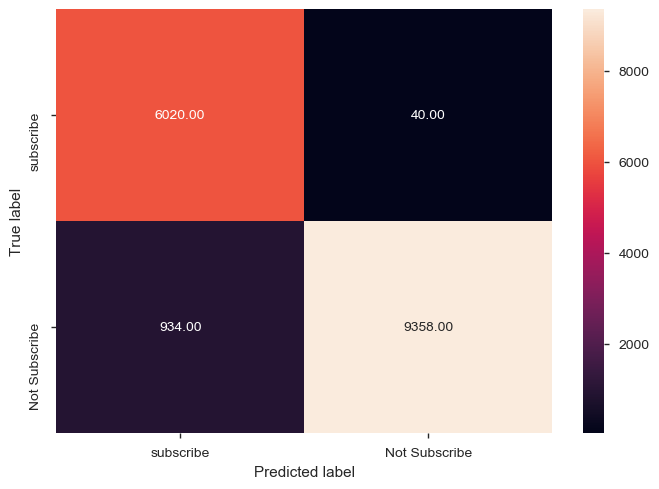

In [127]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["subscribe", "Not Subscribe"] , yticklabels = ["subscribe", "Not Subscribe"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Fine Tuning the parameters

In [135]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [136]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])},
  

In [137]:
tree.best_score_

0.9908154192995269

In [138]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [139]:
tree.best_params_

{'max_depth': 8, 'max_features': 7}

In [140]:
train_pred = tree.predict(X_train)

In [141]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     67342
         1.0       0.98      0.99      0.99     45927
         2.0       0.95      0.96      0.96     12703

    accuracy                           0.98    125972
   macro avg       0.98      0.98      0.98    125972
weighted avg       0.98      0.98      0.98    125972



In [142]:
test_pred = tree.predict(X_test)

In [143]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82      9711
         1.0       0.88      0.82      0.85      7459
         2.0       0.54      0.61      0.57      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.75     22543
   macro avg       0.43      0.48      0.45     22543
weighted avg       0.66      0.75      0.70     22543



C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Building Final Decision Tree Model

In [144]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=7 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Feature Relative Importance

In [145]:
clf_tree.feature_importances_

array([0.00000000e+00, 2.14756915e-03, 5.64393066e-04, 4.40958926e-01,
       6.71785765e-02, 1.75706703e-01, 2.35465140e-02, 1.28961570e-02,
       4.23179371e-02, 7.27176176e-05, 0.00000000e+00, 7.37197076e-03,
       1.65358550e-01, 4.90488407e-04, 0.00000000e+00, 6.90344738e-04,
       1.63028955e-07, 5.78438809e-02, 2.05546516e-03, 7.99642911e-04])

In [146]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('attack_nmap', 0.0),
 ('attack_pod', 0.0021475691483565118),
 ('attack_teardrop', 0.0005643930658005933),
 ('count', 0.44095892636695555),
 ('diff_srv_rate', 0.0671785764505578),
 ('dst_bytes', 0.17570670281121942),
 ('dst_host_count', 0.02354651397455127),
 ('dst_host_diff_srv_rate', 0.012896157036950566),
 ('dst_host_same_src_port_rate', 0.04231793713765162),
 ('dst_host_srv_diff_host_rate', 7.271761759166032e-05),
 ('duration', 0.0),
 ('hot', 0.007371970762951654),
 ('last_flag', 0.16535855044269757),
 ('logged_in', 0.0004904884069682696),
 ('num_compromised', 0.0),
 ('service_http', 0.0006903447378506932),
 ('service_telnet', 1.630289553492015e-07),
 ('src_bytes', 0.05784388094094925),
 ('srv_count', 0.002055465159410615),
 ('srv_diff_host_rate', 0.0007996429105817058)]

In [147]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

Feature    importance
3                         count  4.409589e-01
5                     dst_bytes  1.757067e-01
12                    last_flag  1.653586e-01
4                 diff_srv_rate  6.717858e-02
17                    src_bytes  5.784388e-02
8   dst_host_same_src_port_rate  4.231794e-02
6                dst_host_count  2.354651e-02
7        dst_host_diff_srv_rate  1.289616e-02
11                          hot  7.371971e-03
1                    attack_pod  2.147569e-03
18                    srv_count  2.055465e-03
19           srv_diff_host_rate  7.996429e-04
15                 service_http  6.903447e-04
2               attack_teardrop  5.643931e-04
13                    logged_in  4.904884e-04
9   dst_host_srv_diff_host_rate  7.271762e-05
16               service_telnet  1.630290e-07
0                   attack_nmap  0.000000e+00
14              num_compromised  0.000000e+00
10                     duration  0.000000e+00

In [148]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [149]:
tree_test_pred.sample( n = 10 )

actual  predicted
15937     3.0        0.0
400       0.0        0.0
3936      3.0        0.0
8664      1.0        1.0
11591     1.0        1.0
8610      2.0        0.0
8475      0.0        0.0
10659     0.0        0.0
8656      0.0        0.0
6536      0.0        0.0

In [150]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7498114714101939

Text(0.5, 28.3611111111111, 'Predicted label')

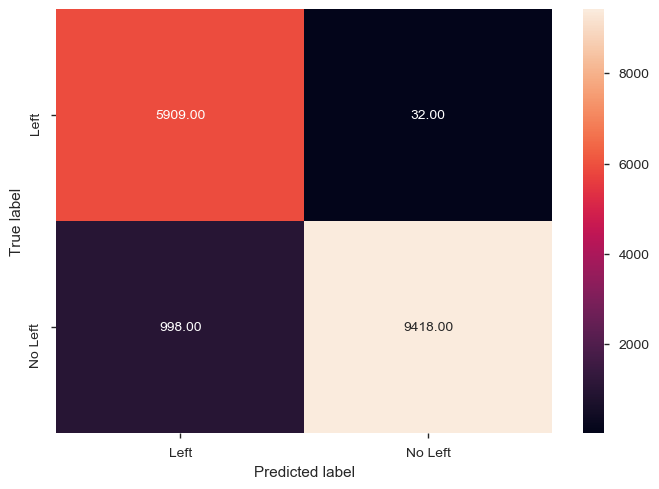

In [151]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Naive Bayes Model

#### 1) BernoulliNB

In [152]:
from sklearn.naive_bayes import BernoulliNB

In [153]:
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [154]:
bnb_clf.predict(X_train)

array([1., 1., 0., ..., 0., 1., 0.])

Text(0.5, 28.3611111111111, 'Predicted label')

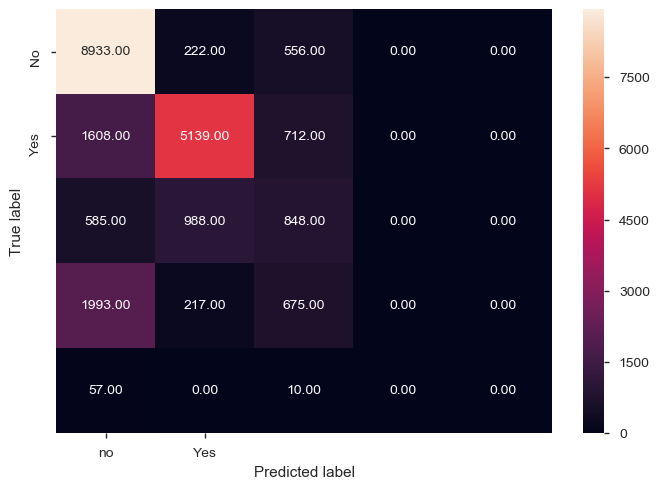

In [155]:
nb_cm = metrics.confusion_matrix( y_test,bnb_clf.predict( X_test) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [156]:
metrics.accuracy_score( y_test, bnb_clf.predict( X_test ) )

0.6618462493900545

#### 2) GaussianNB

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [159]:
gnb_clf.predict(X_train)

array([1., 1., 0., ..., 1., 1., 1.])

Text(0.5, 28.3611111111111, 'Predicted label')

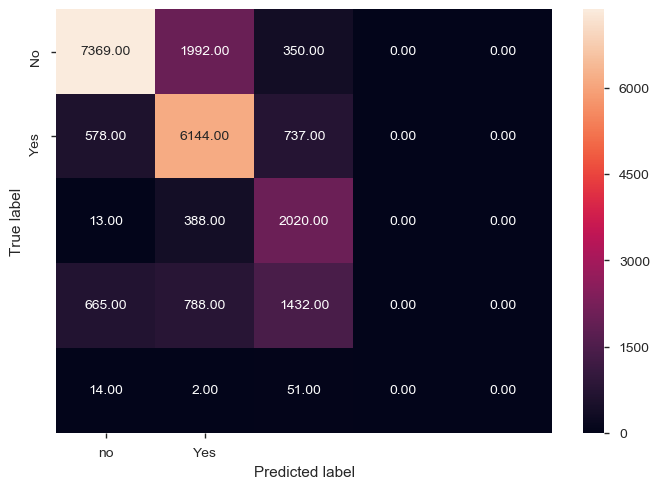

In [160]:
nb_cm = metrics.confusion_matrix( y_test,gnb_clf.predict( X_test) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [161]:
metrics.accuracy_score( y_test, bnb_clf.predict( X_test ) )

0.6618462493900545

### Support Vector Machine (SVM)

#### 1) LinearSVC

In [162]:
from sklearn.svm import LinearSVC

In [163]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train, y_train)

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [165]:
print(svm_clf.coef_)

[[-8.32601381e-01 -2.32065672e-01 -5.03771804e-01 -1.32700436e-02
  -2.72992661e-01  5.94240690e-03 -4.57092421e-03 -8.34796012e-01
  -4.64835724e-01 -1.62337788e+00  6.09212816e-04  7.56612092e-02
   1.57895594e-01  7.46761345e-01 -4.59168513e-01  7.23689618e-01
  -6.33540849e-01 -1.99244928e-03  1.23220388e-02 -3.14950282e-01]
 [-8.55455148e-01  1.68325640e-01  1.22313245e+00  9.04926642e-03
  -6.21251405e-01 -1.83486907e-02  2.28867910e-03 -1.59274458e+00
  -6.85618104e-01 -8.84103133e-02 -1.15591526e+00 -6.83277719e-01
  -5.33537693e-02 -1.08443047e+00  6.01674155e-02 -3.73834440e-01
   1.17671344e+00 -1.56942618e-03 -4.92263215e-03  2.03843880e-02]
 [ 1.12578299e+00 -2.95638558e-03 -1.63993834e+00  4.71275328e-04
   5.36996697e-01 -2.40450233e-04  1.19519214e-03  1.71369221e+00
   1.36643439e+00  1.55656731e+00 -2.55221208e-04  5.82665196e-01
  -1.46175264e-01 -7.08895991e-01  5.36498197e-01 -1.47778401e+00
  -9.73302537e-01  1.77825462e-06 -3.06767951e-03  1.11738664e-01]]


In [166]:
print(svm_clf.intercept_)

[-2.18792154  0.51645149  1.24557649]


In [167]:
print(svm_clf.predict(X_train))

[2. 1. 0. ... 2. 1. 0.]


#### 2) SVC

In [39]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [ ]:
model.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],
              'gamma': [0.0001, 0.001]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_y, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Stochastic Gradient Descent (SGD)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [171]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [173]:
model.score(X_test, y_test)

0.7351727809075989

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


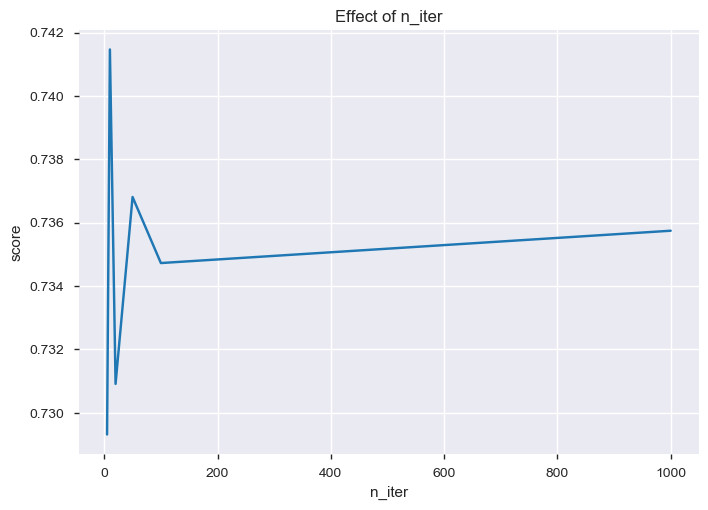

In [174]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


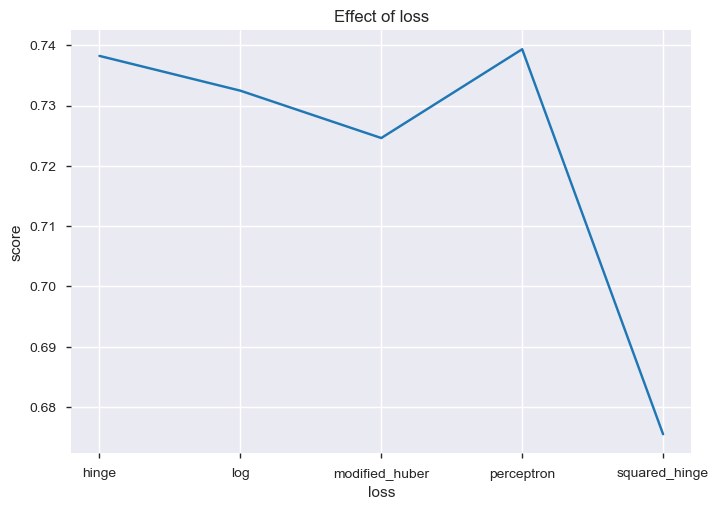

In [175]:
# losses
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.xlabel("loss")
plt.ylabel("score")
plt.title("Effect of loss")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores)

In [176]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "perceptron", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)

In [177]:
clf.fit(X_train, y_train)
print(clf.best_score_)

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9609595783189915


In [178]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


### Neural Network Model

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
# Now apply the transformations to the data:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [73]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
predictions = mlp.predict(test_X)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[9334  116  261    0    0]
 [ 745 6421  293    0    0]
 [ 342  330 1749    0    0]
 [1421  142 1322    0    0]
 [  21    3   43    0    0]]


In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      9711
         1.0       0.92      0.86      0.89      7459
         2.0       0.48      0.72      0.57      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.78     22543
   macro avg       0.44      0.51      0.47     22543
weighted avg       0.69      0.78      0.73     22543



C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
mlp.coefs_

[array([[-1.03935505e-01, -2.25815267e-01,  7.65725688e-02,
          2.86997101e-01, -1.84854969e-01, -2.93470680e-01,
          1.25652231e-01,  2.31779922e-01, -2.19719026e-01,
          3.66586378e-01,  6.42331485e-02,  4.17195741e-01,
          2.38209933e-01, -2.48934516e-01, -3.23034969e-01,
          6.55145580e-01,  1.32192755e-01,  2.93911994e-01,
          2.82747813e-01,  9.63117180e-02, -2.11634219e-01,
          4.32568250e-01,  8.67208182e-02, -1.44586837e-01,
         -7.55739836e-02, -1.63155233e-01,  3.04488466e-01,
          3.10778966e-01, -3.71491283e-01,  1.26858797e-01],
        [ 2.42817002e-01, -4.18454092e-01, -1.47529547e-01,
          2.94978564e-01, -4.99979951e-01, -2.15806926e-01,
          1.36440044e-01, -5.15455720e-01, -3.75351680e-02,
          1.30830184e-01,  1.73611661e-01,  3.68647170e-02,
          8.14188629e-02, -2.59066477e-01, -3.76668318e-02,
          3.66611542e-01, -2.69624628e-01, -1.21901502e-02,
          1.92316501e-01,  3.40584154e-

In [69]:
len(mlp.coefs_)

4

In [70]:
len(mlp.coefs_[0])

20

In [71]:
len(mlp.intercepts_[0])

30

In [72]:
mlp.score(X_train,y_train)

0.5707696948528245

## Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

Bagging-> Building multiple models (typically of the same type) from different subsamples of the training dataset.

Boosting-> Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

Voting-> Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging Algorithms

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

1) Bagged Decision Trees

2) Random Forest

3) Extra Trees

#### 1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

In [189]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [190]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9984679106044382


#### 2. Random Forest
Random forest is an extension of bagged decision trees.

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9989442119657884


#### 3. Extra Trees
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

In [193]:
from sklearn.ensemble import ExtraTreesClassifier

In [194]:
seed = 7
num_trees = 100
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9988251391459773


### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1) AdaBoost

2) Stochastic Gradient Boosting

#### 1. AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

In [195]:
from sklearn.ensemble import AdaBoostClassifier

In [196]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9710570443906169


#### 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

In [197]:
from sklearn.ensemble import GradientBoostingClassifier

In [198]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.996959641444023


### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

In [199]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [200]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vicky Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vicky G

0.9912361547640035
